# From Data to Dollars: AI & Stock Market
Welcome to this workshop! Here, we'll explore how AI techniques can be applied to stock market data to generate insights and build forecasting models. This notebook is designed to help data scientists and finance enthusiasts with an interest in AI/ML to take the first steps to Stock Market Forecasting.

This notebook is a highly condensed demonstration of a full, 12-week course on the topic of AI and the Stock Market. With more time, we will cover more finance and stock fundamentals, machine learning, and developing AI tools for classic analysis of stocks (e.g. building our own dynamic DCF models).

By the end of this session, you'll understand how to process raw data, engineer useful features, and evaluate forecasting approaches.

## Introduction to Stock Market Data and Forecasting
Stock market forecasting involves predicting future stock prices or trends based on historical data. Accurate predictions can guide investment decisions! While these models may not help us beat the market, they do give us the first fundamental steps to building systems that can help predict short-term price movements.

One Important Principle to Keep in-Mind: Over the long-term, stock prices follow **Expected Earnings**.

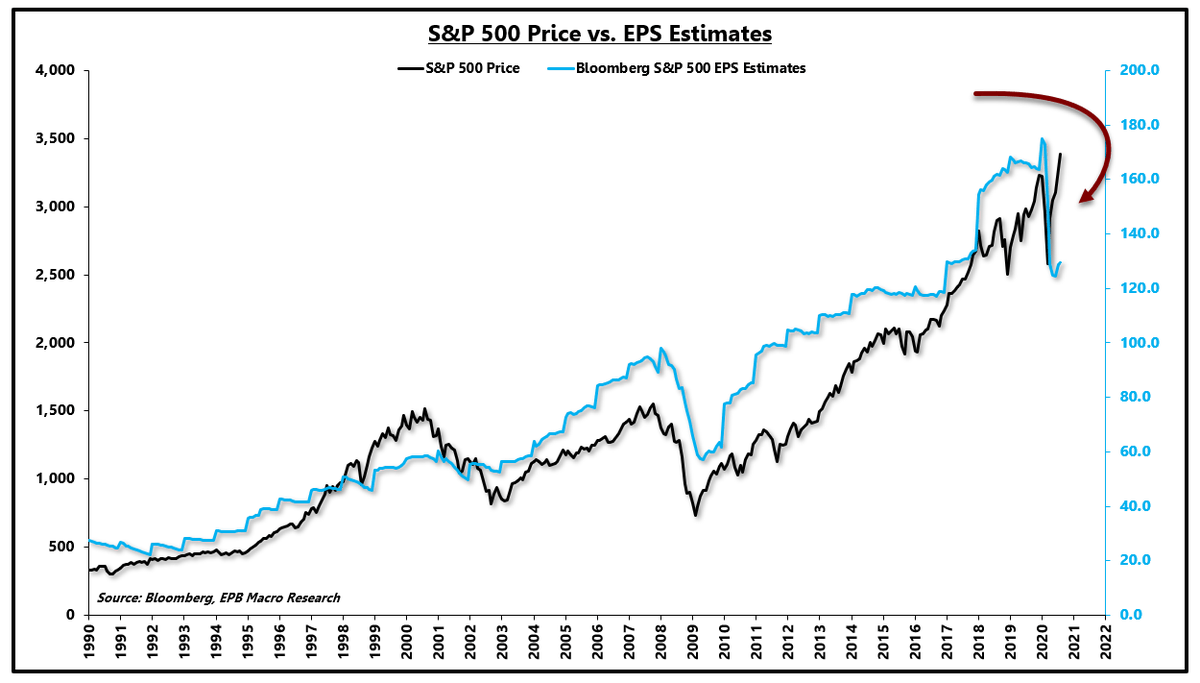

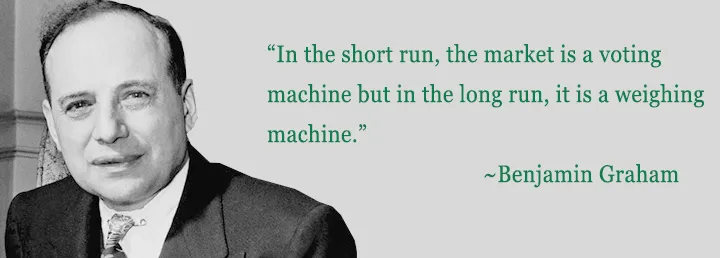

What that means for turning Data to Dollars: We can use historical data to help forecast what a stock might do in the short term. However, in the long-term, we need a different kind of modeling - one that forecasts how a company's earnings (i.e. their profits) will grow over time. Ultimately, stock prices follow earnings!

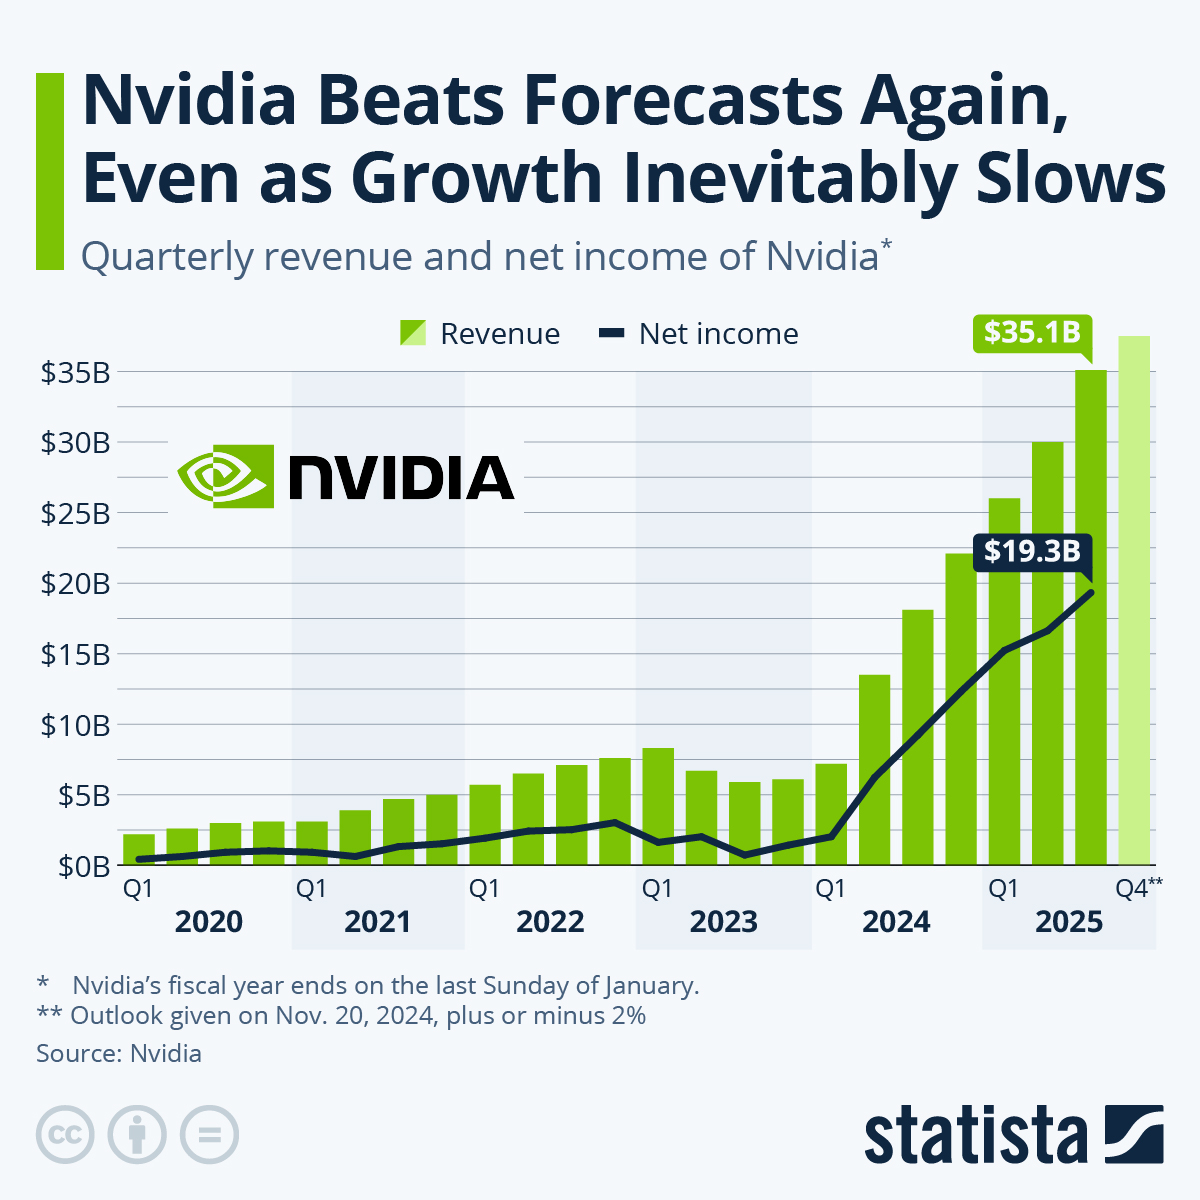

### Overview of Forecasting
Still, we may want to participate in some short/medium term trading, and potentially find patterns and algorithms in the market. At the very least, it's useful to have a baseline for predicting price and what factors historically cause these moves.

Let's review common forecasting methods and introduce the tools and techniques we'll use to analyze stock market data. These approaches include statistical models and modern AI techniques.

# 1. Importing Required Libraries
pandas: A powerful library for data manipulation and analysis, especially for working with structured data in the form of DataFrame
numpy: A library for numerical computations, such as working with arrays and mathematical functions.
matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations.
yfinance: A library for retrieving financial data from Yahoo Finance. It is useful for obtaining stock prices, financial statements, and other market-related data.
requests: A library for making HTTP requests, typically used for interacting with APIs or downloading data from web services.
datetime: A standard Python library for working with dates and times.



# 2. API Key for FRED
The Federal Reserve Economic Data (FRED) API allows users to access economic data. You need an API key to access their services.
You can obtain an API key by creating an account and logging into the FRED website.
GET API KEY FROM https://fredaccount.stlouisfed.org/login/secure/

# 3. Defining Variables for Financial Data Retrieval
ticker: Represents the stock ticker symbol you want to analyze. In this case, "PLTR" refers to Palantir Technologies.
start_date and end_date: Define the time range for which financial data will be retrieved (January 1, 2021, to December 7, 2024).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from datetime import datetime

##api_key = "" # enter API key for FRED data
## GET API KEY FROM https://fredaccount.stlouisfed.org/login/secure/

api_key = '4645d4d031562249dee9ddbae414c7a9'
ticker = "PLTR"
start_date="2021-01-01"
end_date="2024-12-07"

### Load Dataset
We will use stock market data retrieved from Yahoo Finance via the `yfinance` library. This data includes historical prices for major stocks, which forms the foundation for our forecasting models.

Data is at the heart of any and all Investment decisions, whichever type of modeling you will use. Once you have a clean data pipeline together, then you have countless options to model and forecast. Without data, we can't even participate.

# Function Definition
def load_stock_data(ticker, start_date, end_date):
ticker: A string representing the stock ticker symbol (e.g., "AAPL" for Apple, "PLTR" for Palantir Technologies).
start_date: The start date for the data retrieval (e.g., "2021-01-01").
end_date: The end date for the data retrieval (e.g., "2024-12-07").
This function fetches stock data from Yahoo Finance for the specified stock ticker and date range.

# Accessing Stock Data Using yfinance:
stock = yf.Ticker(ticker):  Creates an object for the specified ticker, allowing access to its financial data and methods.

stock_data = stock.history(start=start_date, end=end_date): stock.history(): Fetches historical stock data (e.g., open, high, low, close prices, and trading volume) for the specified date range.
The result is a pandas.DataFrame with columns like Open, High, Low, Close, Volume, and an index of dates.


# Restructuring the DataFrame
 stock_data = stock_data.reset_index()[['Date', 'Close', 'Open', 'High', 'Low', 'Volume']] :
 reset_index(): Converts the Date index into a regular column, making it easier to manipulate or visualize.
[['Date', 'Close', 'Open', 'High', 'Low', 'Volume']]: Selects only the relevant columns to include in the final DataFrame.

# Standardizing the Date Format
 stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None):
 pd.to_datetime(): Converts the Date column to a datetime object if it isn’t already.
.dt.tz_localize(None): Removes any timezone information from the Date column to ensure consistency.

# Returning the Data
return stock_data:
The cleaned and formatted DataFrame is returned, containing the following columns:
Date: The date of the data (in timezone-naive format).
Close: The stock's closing price for the day.
Open: The opening price.
High: The highest price.
Low: The lowest price.
Volume: The number of shares trade

# Fetching Data:
stock_data = load_stock_data(ticker, start_date, end_date):The load_stock_data function fetches historical stock data for Palantir Technologies between January 1, 2021, and December 7, 2024.
The returned result is a pandas.DataFrame containing the columns:
Date, Close, Open, High, Low, and Volume.
stock_data.head(): Displays the first 5 rows of the DataFrame to give a quick preview of the fetched data.

# KEY POINTS:
The function retrieves stock data for a given ticker and date range.
It cleans up the data by selecting only the essential columns and standardizing the Date column format.
The resulting DataFrame is easy to use for analysis or visualization.

In [2]:
# Load stock market data using yfinance
def load_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    stock_data = stock_data.reset_index()[['Date', 'Close', 'Open', 'High', 'Low', 'Volume']]
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    # stock_data.reset_index(inplace=True)
    return stock_data

# Fetch data for PLTR
stock_data = load_stock_data(ticker, start_date, end_date)

# Display the first 5 rows of the stock data
# HAS COLUMNS: Date, Close, open, High, Low, Colume
stock_data.head()

,Date,Close,Open,High,Low,Volume
0,2021-01-04,23.370001,23.910000,24.500000,22.500000,44970400
1,2021-01-05,24.600000,23.180000,24.670000,22.889999,29050400
2,2021-01-06,23.540001,24.120001,24.459999,23.250000,32732900
3,2021-01-07,25.000000,24.020000,25.190001,23.670000,32240000
4,2021-01-08,25.200001,25.700001,26.440001,24.700001,41313800


# FUNCTION 1: get_fred_data

This Python function, get_fred_data, retrieves economic data from the Federal Reserve Economic Data (FRED) API and processes it into a pandas DataFrame. Let’s break it down step-by-step:
    

# Function Definition:
def get_fred_data(series_id, api_key, start_date=None, end_date=None):

series_id: The unique identifier for the economic data series on FRED (e.g., "GDP" for Gross Domestic Product, "CPIAUCSL" for Consumer Price Index).

api_key: Your personal API key for accessing FRED data. This is required for authentication.

start_date and end_date: Optional parameters to specify the date range for the data. If not provided, all available data is fetched.

# API Endpoint

base_url = "https://api.stlouisfed.org/fred/series/observations" :
base_url: The URL endpoint for retrieving observations of a specific data series from the FRED API.

# Request Parameters
params = {
    "series_id": series_id,
    "api_key": api_key,
    "file_type": "json",
    "observation_start": start_date,
    "observation_end": end_date
}

A dictionary params defines the query parameters to send to the API:
series_id: The requested FRED series.

api_key: Your API key for authorization.

file_type: Specifies the response format, here as JSON.

observation_start and observation_end: Optional parameters to filter data by a start and end date.

# Sending the API Request
response = requests.get(base_url, params=params)
data = response.json()

requests.get(base_url, params=params): Sends an HTTP GET request to the FRED API using the provided parameters.

response.json(): Converts the JSON response from the API into a Python dictionary.

# Processing the Response
if "observations" in data:
    df = pd.DataFrame(data["observations"])
    
The FRED API returns a list of observations in the key "observations". Each observation includes:
date: The date of the observation.

value: The corresponding value for that date.

If the "observations" key exists, it is converted into a pandas DataFrame for easier analysis.

# Data Cleaning
df["date"] = pd.to_datetime(df["date"])

df["value"] = pd.to_numeric(df["value"], errors="coerce")

pd.to_datetime(df["date"]): Converts the date column to a datetime object for date-based operations.

pd.to_numeric(df["value"], errors="coerce"): Converts the value column to numeric. Any invalid entries (e.g., missing or non-numeric values) are coerced to NaN.


# Returning or Handling Errors
return df

If the "observations" key is present, the cleaned DataFrame is returned.

else:
    print(f"Error fetching data for {series_id}: {data.get('error_message', 'Unknown error')}")
    return None
    
If the API response does not contain "observations", it logs an error message and returns None.


# KEY POINTS FOR FUNCTION 1:

Purpose: Fetches economic data from FRED and prepares it for analysis in a structured format.
    
Error Handling: If the API response lacks data or returns an error, it notifies the user with a message.
    
Versatility: Allows optional date filtering, making it adaptable to various time frames.

# FUNCTION 2: get_clean_fred_data

This function, get_clean_fred_data, retrieves and processes economic data for multiple indicators from the Federal Reserve Economic Data (FRED) API, then combines the data into a single DataFrame. Here's a detailed explanation of each part:

# Function Definition:

def get_clean_fred_data(api_key, start_date, end_date):
    
api_key: Your API key for accessing FRED data.
    
start_date and end_date: The date range for which the economic data should be fetched.
    

# Defining Economic Indicators
indicators = {
    "GDP": "GDP",
    "Unemployment Rate": "UNRATE",
    "CPI": "CPIAUCSL",
    "Federal Funds Rate": "FEDFUNDS",
    "10-Year Treasury Rate": "DGS10"
}

A dictionary indicators maps human-readable names of economic indicators to their respective FRED series IDs:

GDP: Gross Domestic Product.

UNRATE: Unemployment Rate.

CPIAUCSL: Consumer Price Index for All Urban Consumers.

FEDFUNDS: Federal Funds Rate.

DGS10: 10-Year Treasury Rate.


# Initializing an Empty DataFrame

all_data = pd.DataFrame()

An empty DataFrame all_data is created to store the combined data for all indicators.


# Looping Through Indicators

for name, series_id in indicators.items():

Iterates over each key-value pair in the indicators dictionary:
    
name: Human-readable name of the indicator (e.g., "GDP").
    
series_id: The corresponding FRED series ID (e.g., "GDP").

# Fetching Data for Each Indicator
print(f"Fetching data for {name}...")

df = get_fred_data(series_id, api_key, start_date, end_date)

A message is printed indicating the current indicator being fetched.

The function get_fred_data (explained earlier) retrieves the data for the given series ID and date range, returning a DataFrame



# Processing the Data
if df is not None:
    df = df.rename(columns={"value": name})
    df = df.set_index("date")
    
Renaming Columns:

The value column from the retrieved DataFrame is renamed to the human-readable name of the indicator (name), making it easier to distinguish multiple indicators.

Setting the Date as Index:

The date column is set as the DataFrame's index to align data by dates.


# Merging DataFrames
if all_data.empty:
    all_data = df[[name]]
else:
    all_data = all_data.join(df[[name]], how="outer")
    
First Iteration:

If all_data is empty (first indicator), it is initialized with the current indicator's DataFrame.

Subsequent Iterations:

The new indicator's DataFrame is joined to all_data using an outer join:

Preserves all dates, even if some indicators have missing values for certain dates.


# Final Combined DataFrame

After the loop completes, all_data contains all the economic indicators, aligned by date, with each indicator as a separate column

# KEY POINTS OF FUNCTION 2:
    
Automated Fetching: Retrieves multiple economic indicators in one go.
    
Data Alignment: Aligns all data by date, even if some indicators are missing values.
    
Clean Format: Produces a unified DataFrame with indicators as columns.

  # Sort the DataFrame by date
  all_data = all_data.sort_index()
  
  
This snippet processes the combined DataFrame (all_data) containing macroeconomic data, ensuring it is clean, time-aligned, and formatted correctly. Here's a step-by-step explanation:

sort_index(): Sorts the DataFrame based on its index, which in this case is the date.

Ensures that the data is in chronological order.

Essential for time-series analysis and visualization.


# Forward Filling Missing Values

df_macro = all_data.fillna(method='ffill')
fillna(method='ffill'):

Replaces missing values (NaN) with the last available value for each column.

This is called "forward fill" because it propagates the previous valid value forward in time.

Why Forward Fill?:

Useful for economic data where some indicators may not have daily updates (e.g., GDP is quarterly, CPI is monthly).

Helps maintain continuity in the data, which is crucial for models or visualizations that require complete datasets.


# Resetting the Index:
    
df_macro = df_macro.reset_index()

reset_index():

Moves the current index (the date) back into a regular column named date.

Resets the DataFrame to use a default integer-based index.



# Converting the Date Column:

df_macro['date'] = pd.to_datetime(df_macro['date'])

Ensures the date column is in the proper datetime format, which is critical for:

Time-series analysis.

Plotting data with dates on the x-axis.


# Renaming the Date Column:

df_macro.rename(columns={'date': 'Date'}, inplace=True)

Renames date to Date:

Standardizes column names to align with common conventions.

This is particularly useful if other parts of the code expect the column to be named Date.



# Returning the Cleaned DataFrame:


return df_macro

Returns the processed DataFrame (df_macro), which now:

Is sorted by date.

Has missing values forward-filled.

Uses a clean column structure with a Date column for time-based analysis.


# Key Features of the Final DataFrame

Sorted by Date: Chronologically ordered for consistency.

No Missing Values: Columns are forward-filled where necessary.

Datetime Column: Date column is ready for time-series operations.

Clean and Aligned: Suitable for analysis, visualization, or modeling.


In [3]:
# fetch FRED data
import requests
import pandas as pd
from datetime import datetime, timedelta

########################################################################################
##FUNCTION 1: get_fred_data

def get_fred_data(series_id, api_key, start_date=None, end_date=None):
    base_url = "https://api.stlouisfed.org/fred/series/observations"

    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": start_date,
        "observation_end": end_date
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    if "observations" in data:
        df = pd.DataFrame(data["observations"])
        df["date"] = pd.to_datetime(df["date"])
        df["value"] = pd.to_numeric(df["value"], errors="coerce")
        return df
    else:
        print(f"Error fetching data for {series_id}: {data.get('error_message', 'Unknown error')}")
        return None

####################################################################################################

##FUNCTION 2: get_clean_fred_data

def get_clean_fred_data(api_key, start_date, end_date):
  # List of economic indicators and their FRED series IDs
  indicators = {
      "GDP": "GDP",
      "Unemployment Rate": "UNRATE",
      "CPI": "CPIAUCSL",
      "Federal Funds Rate": "FEDFUNDS",
      "10-Year Treasury Rate": "DGS10"
  }

  all_data = pd.DataFrame()

  for name, series_id in indicators.items():
      print(f"Fetching data for {name}...")
      df = get_fred_data(series_id, api_key, start_date, end_date)
      if df is not None:
          df = df.rename(columns={"value": name})
          df = df.set_index("date")
          if all_data.empty:
              all_data = df[[name]]
          else:
              all_data = all_data.join(df[[name]], how="outer")

###############################################################################

  # Sort the DataFrame by date
  all_data = all_data.sort_index()

  # forward fill the dataframe columns
  df_macro = all_data.fillna(method='ffill')
  df_macro = df_macro.reset_index()
  df_macro['date'] = pd.to_datetime(df_macro['date'])
  df_macro.rename(columns={'date': 'Date'}, inplace=True)


  return df_macro

# Step-by-Step Breakdown:

Calling the get_clean_fred_data Function
df_macro = get_clean_fred_data(api_key, start_date, end_date)

get_clean_fred_data: This function was explained earlier. It:

Retrieves data for multiple economic indicators (like GDP, unemployment rate, CPI, etc.) using their FRED series IDs.

Processes the data:

Aligns it by date.

Forward-fills missing values.

Formats and renames columns.

Combines all the indicators into a single DataFrame.


Parameters Passed:

api_key: The API key for authenticating requests to the FRED API.

start_date: The start date for retrieving data.

end_date: The end date for retrieving data.

Output (df_macro):
A cleaned and combined DataFrame containing macroeconomic data over the specified date range.


# Displaying the DataFrame:
df_macro

When you call the variable name df_macro in an interactive Python environment (e.g., Jupyter Notebook), it displays the contents of the DataFrame.


# Key Features of df_macro
Columns:

Date: The date of observation, properly formatted as datetime.

Economic Indicators: Columns like GDP, Unemployment Rate, etc., containing their respective values.

Missing Data Handling:

Missing values are forward-filled using the most recent available data.
Date Alignment:

All indicators are aligned to the same dates, even if some indicators don't update as frequently.

In [4]:
# Get economic data for the specified time period
df_macro = get_clean_fred_data(api_key, start_date, end_date)
df_macro

Fetching data for GDP...
Fetching data for Unemployment Rate...
Fetching data for CPI...
Fetching data for Federal Funds Rate...
Fetching data for 10-Year Treasury Rate...


<ipython-input-3-9e113fbb6723>:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_macro = all_data.fillna(method='ffill')


,Date,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate
0,2021-01-01,22656.793,6.4,262.518,0.09,NaN
1,2021-01-04,22656.793,6.4,262.518,0.09,0.93
2,2021-01-05,22656.793,6.4,262.518,0.09,0.96
3,2021-01-06,22656.793,6.4,262.518,0.09,1.04
4,2021-01-07,22656.793,6.4,262.518,0.09,1.08
...,...,...,...,...,...,...
1032,2024-12-02,29354.321,4.2,315.454,4.64,4.19
1033,2024-12-03,29354.321,4.2,315.454,4.64,4.23
1034,2024-12-04,29354.321,4.2,315.454,4.64,4.19
1035,2024-12-05,29354.321,4.2,315.454,4.64,4.17


# Explanation of the Code:
    
This code merges two datasets—stock_data (containing stock market data) and df_macro (containing macroeconomic indicators)—into a single DataFrame, aligning them by the Date column



# The pd.merge Function
data = pd.merge(stock_data, df_macro, on='Date', how='left')

The pd.merge function combines two DataFrames based on a common key or column. Here's a breakdown:

Inputs:

stock_data: A DataFrame containing stock data (e.g., close price, volume).

df_macro: A DataFrame containing macroeconomic data (e.g., GDP, unemployment rate).

Parameters:

on='Date': Specifies the column used to align the two DataFrames. Both DataFrames must have a column named Date.

how='left': Performs a left join, meaning:

All rows from stock_data will be included in the output.

Rows from df_macro will be matched based on the Date column.

If a date in stock_data doesn’t exist in df_macro, the macroeconomic values will be NaN.

Output:

A merged DataFrame (data) that contains all the columns from stock_data and the relevant columns from df_macro, aligned by date.


# Displaying the Resulting DataFrame
data

When the resulting DataFrame (data) is displayed, it combines stock and macroeconomic data. Here's an example:
it includes new fields df_macro and stock_data left join on date


# Key Features of the Merged Data

Stock Data:

Includes all rows from stock_data.

Macroeconomic Data:

Matches macroeconomic values (GDP, Unemployment Rate, etc.) to the corresponding dates.

Rows in stock_data with no matching date in df_macro get NaN for macroeconomic columns.

Aligned by Date:

The Date column is the key for merging, ensuring time-series consistency.


# Other use cases for this
Exploratory Analysis:

Analyze the relationship between stock prices and macroeconomic factors.
print(data.corr())

Visualization:

Plot stock price trends alongside a macroeconomic indicator:

data.plot(x='Date', y=['Close', 'GDP'], figsize=(12, 6), title='Stock Prices vs GDP')
plt.grid()
plt.show():

Machine Learning:

Use the combined dataset for predictive modeling (e.g., predicting stock prices based on macroeconomic factors).


In [5]:
##this contains the following fields
##Date, GDP, Unemployment Rate, CPI, Federal Funds Rate, 10-Year Treasury Rate
df_macro

,Date,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate
0,2021-01-01,22656.793,6.4,262.518,0.09,NaN
1,2021-01-04,22656.793,6.4,262.518,0.09,0.93
2,2021-01-05,22656.793,6.4,262.518,0.09,0.96
3,2021-01-06,22656.793,6.4,262.518,0.09,1.04
4,2021-01-07,22656.793,6.4,262.518,0.09,1.08
...,...,...,...,...,...,...
1032,2024-12-02,29354.321,4.2,315.454,4.64,4.19
1033,2024-12-03,29354.321,4.2,315.454,4.64,4.23
1034,2024-12-04,29354.321,4.2,315.454,4.64,4.19
1035,2024-12-05,29354.321,4.2,315.454,4.64,4.17


In [6]:
##this contains the following fields
##Date, Close, Open, High, Low, Volume

stock_data

,Date,Close,Open,High,Low,Volume
0,2021-01-04,23.370001,23.910000,24.500000,22.500000,44970400
1,2021-01-05,24.600000,23.180000,24.670000,22.889999,29050400
2,2021-01-06,23.540001,24.120001,24.459999,23.250000,32732900
3,2021-01-07,25.000000,24.020000,25.190001,23.670000,32240000
4,2021-01-08,25.200001,25.700001,26.440001,24.700001,41313800
...,...,...,...,...,...,...
984,2024-12-02,66.389999,67.440002,67.879997,65.959999,46405000
985,2024-12-03,70.959999,66.410004,71.370003,66.150002,100751400
986,2024-12-04,69.849998,71.129997,71.180000,67.279999,86284800
987,2024-12-05,71.870003,70.110001,72.980003,69.889999,66585800


In [7]:
# Merge stock and economic data
data = pd.merge(stock_data, df_macro, on='Date', how='left')
data

,Date,Close,Open,High,Low,Volume,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate
0,2021-01-04,23.370001,23.910000,24.500000,22.500000,44970400,22656.793,6.4,262.518,0.09,0.93
1,2021-01-05,24.600000,23.180000,24.670000,22.889999,29050400,22656.793,6.4,262.518,0.09,0.96
2,2021-01-06,23.540001,24.120001,24.459999,23.250000,32732900,22656.793,6.4,262.518,0.09,1.04
3,2021-01-07,25.000000,24.020000,25.190001,23.670000,32240000,22656.793,6.4,262.518,0.09,1.08
4,2021-01-08,25.200001,25.700001,26.440001,24.700001,41313800,22656.793,6.4,262.518,0.09,1.13
...,...,...,...,...,...,...,...,...,...,...,...
984,2024-12-02,66.389999,67.440002,67.879997,65.959999,46405000,29354.321,4.2,315.454,4.64,4.19
985,2024-12-03,70.959999,66.410004,71.370003,66.150002,100751400,29354.321,4.2,315.454,4.64,4.23
986,2024-12-04,69.849998,71.129997,71.180000,67.279999,86284800,29354.321,4.2,315.454,4.64,4.19
987,2024-12-05,71.870003,70.110001,72.980003,69.889999,66585800,29354.321,4.2,315.454,4.64,4.17


## Data Preparation and Visualization
Before building models, it's crucial to clean and understand the dataset. Visualization helps identify trends, outliers, and patterns in the data.

### Data Cleaning and Preprocessing
Data cleaning involves handling missing values, removing anomalies, and ensuring consistent formatting. This ensures that our models are trained on high-quality data, minimizing noise.

# Explanation of the Code:
data.isnull().sum()

This code checks for missing values (NaN) in the data DataFrame and provides a summary of how many missing values exist in each column.

data.isnull()
What it Does:

Generates a new DataFrame of the same shape as data, where:

Each element is True if the corresponding element in data is NaN.

Each element is False otherwise.

where is a NaN : Not a Number it will flag a true and is a valid value then it will flag as false

# .sum()

What it Does:
    
Sums up the True values in each column. Since True is treated as 1 and False as 0, this gives the total count of NaN values for each column.

# useful for:
Identify Missing Data: This is a quick way to see how much data is missing in each column, helping you decide:
        
Whether to fill missing values (fillna()).

Drop rows or columns with too many missing values (dropna()).

# It indicates there are:

1 missing values in the GDP, Unemployment Rate, CPI,Federal Funds Rate, 10-Year Treasury Rate column AS VALUE IS GREATER THAN 0
No missing values in the High and Low columns and other columns where value is 0

In [8]:
data.isnull().sum()

,0
Date,0
Close,0
Open,0
High,0
Low,0
Volume,0
GDP,0
Unemployment Rate,0
CPI,0
Federal Funds Rate,0


# Explanation of the Code

data.dropna(inplace=True)

This line removes rows with missing values (NaN) from the data DataFrame and modifies the DataFrame in place, meaning the changes are applied directly to data without creating a new DataFrame.

# Breaking It Down

1. data.dropna()
What It Does:

Identifies rows in the DataFrame data that contain missing values (NaN).
Removes those rows from the DataFrame.

Default Behavior:

Removes a row if any column in that row contains NaN.

2. inplace=True

What It Does:

Applies the changes directly to the original data DataFrame.

Without inplace=True, dropna() would return a new DataFrame with the rows removed, leaving the original DataFrame unchanged.

# Use Case
When to Use:

If your analysis or model cannot handle missing values, and you want to remove incomplete data entirely.

When the dataset is large and dropping a few rows with missing data won't significantly impact the analysis.

Caution:

Be careful when using this method if a significant portion of your data contains NaN. It could lead to data loss.

# Alternative Approaches:
    
If dropping rows is too aggressive, consider other methods:

Filling Missing Values:

Replace NaN with specific values, such as the mean, median, or a placeholder
#data.fillna(value=0, inplace=True)  # Replace NaN with 0
#data.fillna(method='ffill', inplace=True)  # Forward-fill missing values



Dropping Columns with Many Missing Values:

Instead of rows, remove columns with too many NaN values

#data.dropna(axis=1, inplace=True)  # Drop columns instead of rows

In [9]:
# Drop missing values as needed
data.dropna(inplace=True)

# Explanation of the Code

This Python code creates a dual-axis plot to visualize both the historical stock price (line plot) and trading volume (bar plot) on the same chart. The two y-axes allow for different scales:
    one for the stock price and one for the trading volume.
    

# 1. Create the Figure and Axes
#plt.figure(figsize=(12, 6))
#ax1 = plt.gca()  # Get current axes
#ax2 = ax1.twinx()  # Create a second axes that shares the same x-axis

plt.figure(figsize=(12, 6)): Creates a figure with a specified size of 12x6 inches.

plt.gca(): Retrieves the current axis (ax1) for the primary plot.

ax1.twinx(): Creates a secondary y-axis (ax2) that shares the same x-axis with ax1.


# 2. Plot the Stock Price on the Primary Axis
#ax1.plot(data["Date"], data["Close"], label="Close Price", color="blue")

ax1.plot(...): Plots a line graph for stock prices (column Close in data) against the dates (Date).

label="Close Price": Sets the legend label for the stock price.

color="blue": Sets the line color to blue.


# 3. Plot the Trading Volume on the Secondary Axis

#ax2.bar(data["Date"], data["Volume"], label="Volume", color="red", alpha=0.4)

ax2.bar(...): Creates a bar chart for trading volume (Volume) against the dates (Date).

label="Volume": Sets the legend label for the volume.

color="red": Sets the bar color to red.

alpha=0.4: Sets transparency for the bars to make it visually less dominant.


# 4. Set Titles and Labels
#ax1.set_title("$PLTR Stock Price and Volume")

#ax1.set_ylabel("Price ($)", color="blue")

#ax2.set_ylabel("Volume", color="red")

ax1.set_title(...): Adds a title to the plot.

ax1.set_ylabel(...): Labels the y-axis for the primary axis (ax1) with the text "Price ($)".

color="blue": Colors the y-axis label in blue to match the price line.

ax2.set_ylabel(...): Labels the y-axis for the secondary axis (ax2) with the text "Volume".

color="red": Colors the y-axis label in red to match the volume bars.

# 5. Combine Legends for Both Axes
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines + lines2, labels + labels2, loc="upper left")

ax1.get_legend_handles_labels(): Retrieves the legend elements (lines and labels) for the primary axis.

ax2.get_legend_handles_labels(): Retrieves the legend elements for the secondary axis.

ax1.legend(...): Combines the legends from both axes and places them in the upper left corner of the plot.


# 6. Display the Plot

#plt.show()

plt.show(): Renders the plot.

# Visual Output
The resulting plot will have:


A blue line for the Close Price on the primary y-axis (left side).

Red bars for the Volume on the secondary y-axis (right side).

A combined legend in the top-left corner showing labels for both Close Price and Volume.

The x-axis will represent the dates (Date).


# Use Case:
    
This visualization allows you to analyze:

How stock prices fluctuate over time.

How trading volume correlates with price changes.


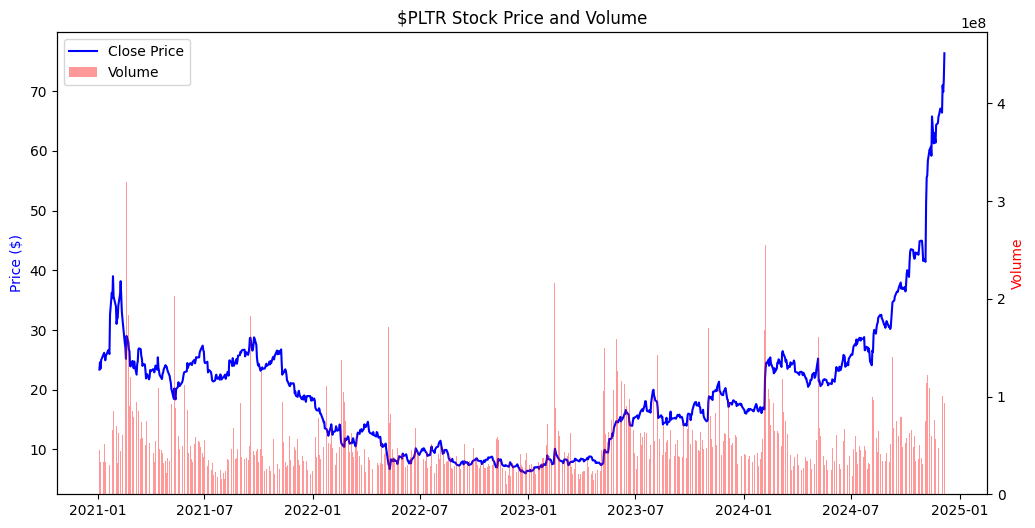

In [10]:
# Plot historical stock price and volume
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axes
ax2 = ax1.twinx()  # Create a second axes that shares the same x-axis

ax1.plot(data["Date"], data["Close"], label="Close Price", color="blue")
ax2.bar(data["Date"], data["Volume"], label="Volume", color="red", alpha=0.4)

ax1.set_title("$PLTR Stock Price and Volume")
ax1.set_ylabel("Price ($)", color="blue")
ax2.set_ylabel("Volume", color="red")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()

# Explanation of the Code

This Python code creates a grid of subplots to visualize multiple economic indicators over time. Each subplot displays one indicator plotted against the Date column from the data DataFrame.


# Breaking It Down

# 1. Create the Subplots
#fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plt.subplots(2, 2):

Creates a grid of 2x2 subplots (4 total plots).

axes is a 2D array of Axes objects corresponding to each subplot.

figsize=(15, 10):

Specifies the overall figure size (width=15 inches, height=10 inches).


# 2. Specify the Indicators to Plot


#indicators = ["GDP", "Unemployment Rate", "CPI", "Federal Funds Rate"]

A list of the column names from the data DataFrame representing the economic indicators to visualize.

# 3. Plot Each Indicator

for ax, indicator in zip(axes.flatten(), indicators):
    ax.plot(data["Date"], data[indicator], label=indicator, color="orange")
    ax.set_title(indicator)
    ax.set_ylabel(indicator)
    ax.legend()
    
axes.flatten():

Converts the 2D axes array into a 1D array to easily iterate over all subplots.
zip(axes.flatten(), indicators):

Pairs each subplot (ax) with an economic indicator (indicator).
For Each Subplot (ax):

ax.plot(data["Date"], data[indicator], label=indicator, color="orange"):

Plots the indicator's values (y-axis) against the Date (x-axis).

The line is orange, and the legend label is set to the indicator's name.

ax.set_title(indicator):

Adds a title to the subplot, indicating the economic indicator being plotted.

ax.set_ylabel(indicator):

Labels the y-axis with the name of the economic indicator.

ax.legend():

Adds a legend to the subplot for clarity.    


# 4. Adjust Layout

#plt.tight_layout()

plt.tight_layout():

Adjusts the spacing between subplots to minimize overlap and make the chart more visually appealing.

# 5. Display the Plot

#plt.show()

plt.show():

Renders the figure with all the subplots.

# Visual Output

Overall Figure:

A 2x2 grid of subplots, each visualizing one of the four economic indicators over time.

Individual Subplots:


x-axis: Date.

y-axis: The values of the respective economic indicator (e.g., GDP, CPI).

An orange line represents the trend of the indicator.

Each subplot has:

A title indicating the name of the indicator.

A y-axis label matching the indicator's name.

A legend for the plotted line.

# Use Case

Allows for a quick, side-by-side comparison of trends in multiple economic indicators over the same time period.

Useful for identifying correlations or patterns between indicators.

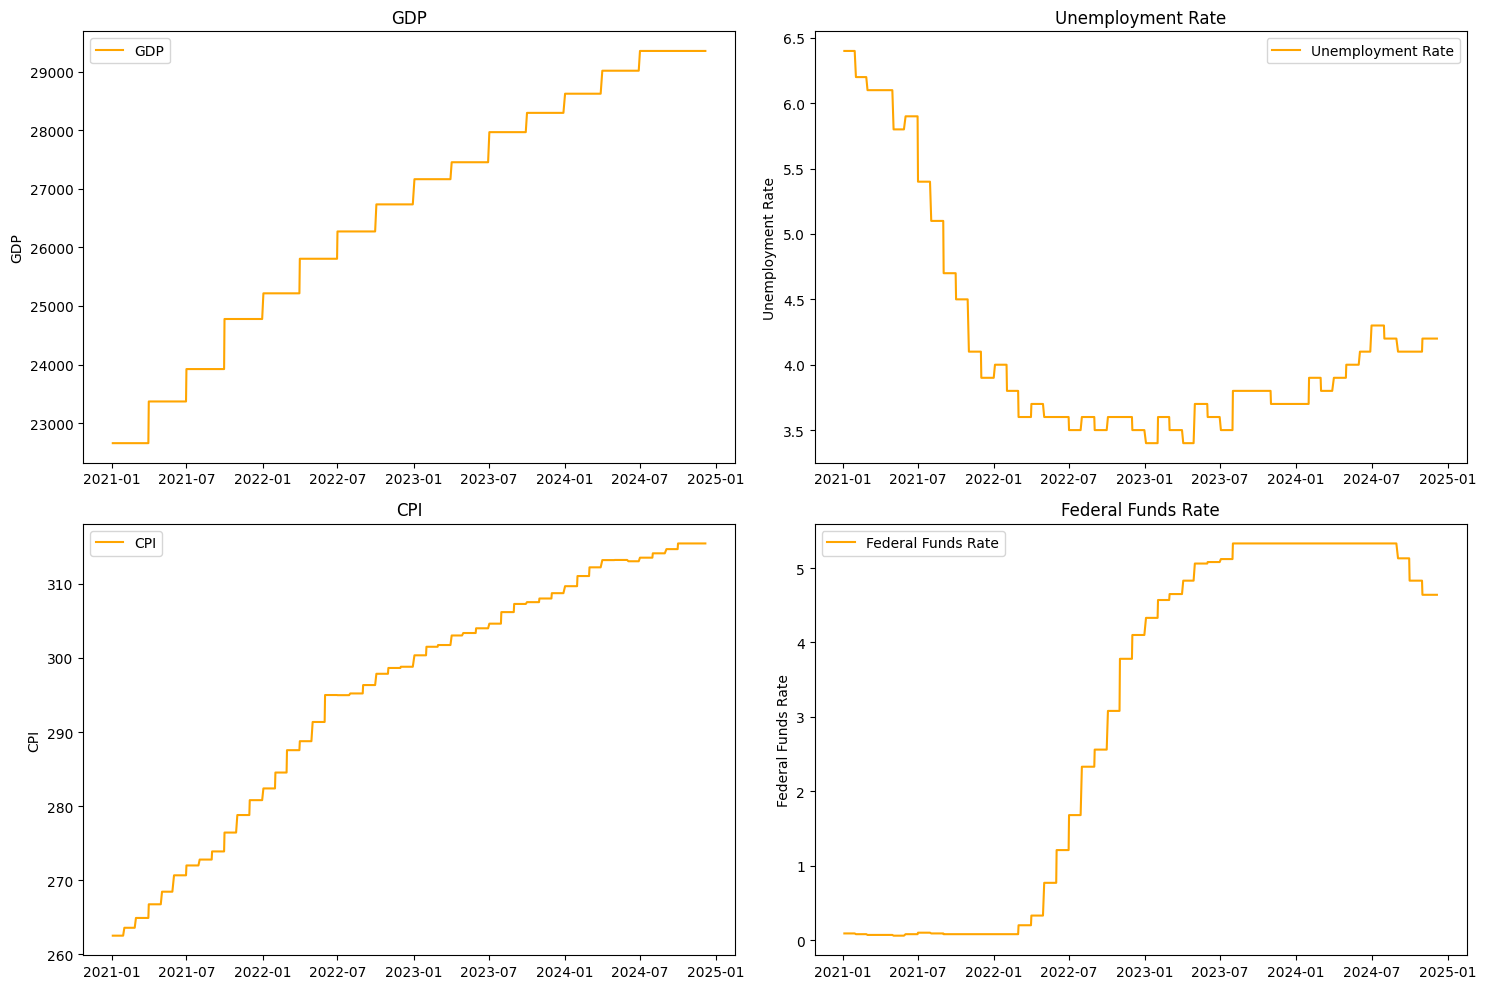

In [11]:
# Visualize economic indicators
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
indicators = ["GDP", "Unemployment Rate", "CPI", "Federal Funds Rate"]
for ax, indicator in zip(axes.flatten(), indicators):
    ax.plot(data["Date"], data[indicator], label=indicator, color="orange")
    ax.set_title(indicator)
    ax.set_ylabel(indicator)
    ax.legend()
plt.tight_layout()
plt.show()

## Feature Engineering
Feature engineering involves creating additional variables that improve the predictive power of our models. This step is critical for extracting actionable insights from raw data.

### Create Some Helpful Features
Examples of features include moving averages, volume trends, and relative strength indices (RSI). These features help capture patterns not directly visible in raw price data.

# Explanation of the Code FUNCTION compute_rsi

This Python function, compute_rsi(data, window), calculates the Relative Strength Index (RSI) for a given time series of stock prices. RSI is a momentum oscillator that measures the speed and change of price movements.
It ranges from 0 to 100 and is used to identify overbought or oversold conditions in the market.

# Breaking It Down

# 1. Input Parameters

data: A pandas Series containing the stock price data.
    
window: The number of periods over which to calculate the RSI.
    This parameter controls how smooth the RSI line is, with larger values resulting in a smoother line.
    

# 2. Calculate Price Differences (delta)
#delta = data.diff(1)

data.diff(1):

Computes the difference between consecutive price points in the time series.

This represents the change in price between periods.

A positive delta indicates a price gain, and a negative delta indicates a price loss.


# 3. Separate Gains and Losses
#gain = delta.where(delta > 0, 0)
#loss = -delta.where(delta < 0, 0)

gain = delta.where(delta > 0, 0):

Keeps positive price changes (gains) and sets the rest to zero.

where(delta > 0, 0) returns the delta where it is positive; otherwise, it returns 0.

loss = -delta.where(delta < 0, 0):

Keeps negative price changes (losses) and sets the rest to zero.

where(delta < 0, 0) returns the -delta where it is negative; otherwise, it returns 0.

# 4. Calculate Moving Averages
#avg_gain = gain.rolling(window=window, min_periods=1).mean()
#avg_loss = loss.rolling(window=window, min_periods=1).mean()

gain.rolling(window=window, min_periods=1).mean():

Computes the rolling average of gains over the specified window.

min_periods=1 ensures that the rolling mean is computed even if the window doesn't cover all data points initially.

loss.rolling(window=window, min_periods=1).mean():

Computes the rolling average of losses over the specified window.


# 5. Calculate Relative Strength (rs)

#rs = avg_gain / avg_loss

avg_gain / avg_loss:

Computes the average gain to average loss ratio (RS).

A higher RS indicates that gains have been stronger relative to losses over the period.



# 6. Calculate RSI
#rsi = 100 - (100 / (1 + rs))

100 - (100 / (1 + rs)):
![image.png](attachment:image.png)


Converts the relative strength into an RSI value.
RSI ranges from 0 to 100, with:

RSI > 70: Indicates overbought conditions.

RSI < 30: Indicates oversold conditions.


# 7. Return RSI
#return rsi

The function returns the calculated RSI series.

# Use Case

RSI Interpretation:

RSI helps traders and analysts identify potential reversal points in the price trend.

An RSI value above 70 is considered overbought, suggesting a possible sell signal.

An RSI value below 30 is considered oversold, suggesting a possible buy signal.


# Explanation of the Code data['RSI'] = compute_rsi(data['Close'], 14)

This Python code snippet applies several technical indicators to a stock price DataFrame,
which is useful for analysis or trading decisions.
It involves computing the RSI (Relative Strength Index), lagging the close price, and adding moving averages.

# 1. Compute RSI

#data['RSI'] = compute_rsi(data['Close'], 14)

data['Close']: The closing prices of the stock.

compute_rsi(data['Close'], 14): Calls the compute_rsi function to calculate the RSI using a 14-period window.

RSI is a momentum oscillator that helps to identify overbought and oversold conditions. A 14-period RSI is a common choice for analysis, indicating short- and medium-term momentum.


# 2. Compute 1-Day Lag of the Close Price

#data['Close_1daylag'] = data['Close'].shift(1)

data['Close'].shift(1):

Creates a new column Close_1daylag that contains the closing prices lagged by one day.

This is useful to analyze price changes between consecutive days or to compare current data with the previous day's data.


# 3. Adding 50-Day and 200-Day Moving Averages
#data['Close_MA50'] = data['Close'].rolling(window=50, min_periods=1).mean()

#data['Close_MA200'] = data['Close'].rolling(window=200, min_periods=1).mean()


data['Close'].rolling(window=50, min_periods=1).mean():

Calculates the 50-day simple moving average (SMA).

window=50 specifies the number of periods.

min_periods=1 ensures that the calculation starts as soon as there is at least one available data point.

data['Close'].rolling(window=200, min_periods=1).mean():

Calculates the 200-day simple moving average (SMA).

window=200 specifies the number of periods.

This helps to identify long-term trends and can be used to confirm or refute short-term signals.



# Visual Interpretation and Use Cases
Relative Strength Index (RSI):


The RSI helps to identify overbought or oversold conditions:

RSI > 70: Overbought, potential sell signal.

RSI < 30: Oversold, potential buy signal.

By adding RSI to the DataFrame, you can monitor the market momentum and adjust trading strategies accordingly.

1-Day Lag Close Price (Close_1daylag):

This lagged close price can be used for analyzing day-to-day price changes, like calculating price returns or identifying trends in price action over consecutive days.

50-Day and 200-Day Moving Averages (Close_MA50 and Close_MA200):


These moving averages are commonly used to identify short-term and long-term trends:

50-Day MA: Smooths the price data over a shorter period, making it useful for identifying intermediate trends.

200-Day MA: Provides a longer-term view and is often used to confirm the primary trend (bullish or bearish).

The crossover of the 50-day and 200-day MA is often a key indicator:

Bullish crossover: When the 50-day MA crosses above the 200-day MA, it can be a signal of an upward trend.

Bearish crossover: When the 50-day MA crosses below the 200-day MA, it can indicate a downward trend.

Use Case:

These indicators can be used together to perform a more in-depth analysis of stock price data.
For instance, combining RSI with moving averages can help to filter out false signals and improve the reliability of trading strategies.

In [12]:
# Calculation of the RSI

##################################################
##FUNCTION   compute_rsi
##################################################

def compute_rsi(data, window):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

###################################################

data['RSI'] = compute_rsi(data['Close'], 14)

# Compute 1-day lag of the Close price
data['Close_1daylag'] = data['Close'].shift(1)

# Adding 50-day and 200-day Moving Average
data['Close_MA50'] = data['Close'].rolling(window=50, min_periods=1).mean()
data['Close_MA200'] = data['Close'].rolling(window=200, min_periods=1).mean()


# Explanation of the Code # Extract features

This Python code snippet extracts and adds date-related information (such as year, month, day, and weekday) to the data DataFrame.
This is useful for time series analysis, filtering data, or visualizing trends over different time periods.

# 1. Extract Year

#data['year'] = data['Date'].dt.year

data['Date']: Assumes Date is a column in the DataFrame containing datetime objects.

.dt.year:

Extracts the year from each date in the Date column.

Creates a new column year in the DataFrame that contains the year for each date.


# 2. Extract Month
#data['month'] = data['Date'].dt.month

.dt.month:
Extracts the month from each date in the Date column.

Creates a new column month that contains the month (as an integer) for each date.

# 3. Extract Day of the Month

#data['day'] = data['Date'].dt.day

.dt.day:
Extracts the day of the month from each date in the Date column.

Creates a new column day that contains the day for each date.


# 4. Extract Weekday

#data['weekday'] = data['Date'].dt.weekday

.dt.weekday:

Extracts the day of the week as an integer (where Monday is 0 and Sunday is 6) from each date in the Date column.

Creates a new column weekday that contains the integer representing the day of the week.


# Use Case

Data Structuring:

Adding these date-related columns can simplify analysis by allowing easy filtering and grouping by year, month, day, or weekday.
For instance, you could calculate monthly or yearly averages, or group data by weekday to study patterns such as trading volumes or stock returns on specific days of the week.

Time Series Analysis:

These columns are essential for time series analysis, as they allow you to break down trends and insights by different time units.

For example:
Yearly trends can be analyzed to understand long-term behavior.

Monthly or weekly patterns can be studied to identify seasonalities or cyclic trends.

Daily trends can provide insights into short-term market movements.

In [13]:
# Extract features
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.weekday;

In [14]:
# View dataframe
data = data.dropna()
data

,Date,Close,Open,High,Low,Volume,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate,RSI,Close_1daylag,Close_MA50,Close_MA200,year,month,day,weekday
1,2021-01-05,24.600000,23.180000,24.670000,22.889999,29050400,22656.793,6.4,262.518,0.09,0.96,100.000000,23.370001,23.985001,23.985001,2021,1,5,1
2,2021-01-06,23.540001,24.120001,24.459999,23.250000,32732900,22656.793,6.4,262.518,0.09,1.04,53.711794,24.600000,23.836667,23.836667,2021,1,6,2
3,2021-01-07,25.000000,24.020000,25.190001,23.670000,32240000,22656.793,6.4,262.518,0.09,1.08,71.733333,23.540001,24.127501,24.127501,2021,1,7,3
4,2021-01-08,25.200001,25.700001,26.440001,24.700001,41313800,22656.793,6.4,262.518,0.09,1.13,73.164563,25.000000,24.342001,24.342001,2021,1,8,4
5,2021-01-11,25.930000,24.610001,26.600000,24.309999,32609000,22656.793,6.4,262.518,0.09,1.15,77.350431,25.200001,24.606667,24.606667,2021,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,2024-12-02,66.389999,67.440002,67.879997,65.959999,46405000,29354.321,4.2,315.454,4.64,4.19,63.024135,67.080002,48.866400,31.550300,2024,12,2,0
985,2024-12-03,70.959999,66.410004,71.370003,66.150002,100751400,29354.321,4.2,315.454,4.64,4.23,69.989205,66.389999,49.526600,31.782900,2024,12,3,1
986,2024-12-04,69.849998,71.129997,71.180000,67.279999,86284800,29354.321,4.2,315.454,4.64,4.19,66.310157,70.959999,50.185600,32.015150,2024,12,4,2
987,2024-12-05,71.870003,70.110001,72.980003,69.889999,66585800,29354.321,4.2,315.454,4.64,4.17,72.224170,69.849998,50.880600,32.260800,2024,12,5,3


## Forecasting Approaches
This section introduces different forecasting techniques, starting from simple baselines to advanced AI models.

### Split Data into Train and Test
To evaluate model performance, we split the data into training and testing subsets. The training set is used for building models, while the test set assesses their accuracy.

# Explanation of the Code below for split data into train and test:
    

This Python code snippet prepares a dataset for machine learning by defining features and the target variable, splitting the data into training and testing sets.

It also prints some information about the data split.

# 1. Define Features and Target Variable
#y_col = 'Close_tomorrow'
#data[y_col] = data['Close'].shift(-1)
#data = data.dropna()
#X_cols = data.drop(columns=['Date', y_col]).columns.tolist()


y_col = 'Close_tomorrow':


Defines the target variable as the closing price of the day after the current date (Close_tomorrow).
This is often used in predictive modeling to forecast the future price based on historical data.
data[y_col] = data['Close'].shift(-1):


Shifts the Close column values down by one day.
This effectively sets the value of Close_tomorrow to be the closing price of the next day.
shift(-1) moves the data up one row, making each row correspond to the closing price of the next day.
data = data.dropna():


Drops any rows with NaN values in the dataset.
This ensures that all data points have complete information for analysis.
X_cols = data.drop(columns=['Date', y_col]).columns.tolist():

Defines the features (X_cols) by excluding the date column and the target variable (Close_tomorrow).
drop(columns=['Date', y_col]) removes these columns from the DataFrame.
columns.tolist() converts the remaining column names into a list, which can be useful for model training.


# 2. Split Data


#X = data[X_cols]
#y = data[y_col]

X = data[X_cols]:

Selects the feature columns (X_cols) as the independent variables.
X represents the data that will be used to train the machine learning model.
y = data[y_col]:

Selects the target variable (y_col), which will be predicted by the model.
y contains the future price values (Close_tomorrow).

3. Create Train-Test Split

train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]

y_train, y_test = y[:train_size], y[train_size:]

train_size = int(0.8 * len(X)):

Determines 80% of the data for the training set.

0.8 is often a standard split ratio for training and testing in machine learning.

len(X) is the number of rows in the feature set X.

X_train, X_test = X[:train_size], X[train_size:]:
    

Splits the feature data into training and testing sets.

X[:train_size] gets the first 80% of the data for training.

X[train_size:] gets the remaining 20% for testing.

y_train, y_test = y[:train_size], y[train_size:]:

Splits the target variable into training and testing sets.

Follows the same split as the feature set.


# 4. Print Data Split Information

#print("Train size:", len(X_train))
#print("Test size:", len(X_test))

Prints the sizes of the training and testing datasets.
This gives an idea of how much data is allocated for model training and testing, helping assess whether there’s enough data for a robust evaluation.

# Use Case
Machine Learning Pipeline:

This code snippet sets up a common machine learning workflow for time series forecasting.

By defining the future price as the target (Close_tomorrow), the model can learn patterns to predict future prices based on historical data.

The data is split into training and testing sets to validate the model’s performance on unseen data.

Performance Evaluation:

The split ensures that the model is evaluated on data that it hasn't seen before, giving a more realistic estimate of how well it might perform in a real-world scenario.

A typical train-test split ratio is 80-20 to provide enough data for training and to test the model's generalization ability.

In [15]:
# Define features and target
y_col = 'Close_tomorrow'
data[y_col] = data['Close'].shift(-1)
data = data.dropna()
X_cols = data.drop(columns=['Date', y_col]).columns.tolist()

print("Using columns:", X_cols)
print("With target variable:", y_col)
# Split data
X = data[X_cols]
y = data[y_col]

# Create train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Using columns: ['Close', 'Open', 'High', 'Low', 'Volume', 'GDP', 'Unemployment Rate', 'CPI', 'Federal Funds Rate', '10-Year Treasury Rate', 'RSI', 'Close_1daylag', 'Close_MA50', 'Close_MA200', 'year', 'month', 'day', 'weekday']
With target variable: Close_tomorrow
Train size: 789
Test size: 198


<ipython-input-15-005b2705ad0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_col] = data['Close'].shift(-1)


# Explanation of the Code - Plot the target variable below
This Python code snippet visualizes the target variable (y, which represents Close_tomorrow) along with the train-test split. It uses a line plot and shaded regions to differentiate the training and testing portions of the data.

# 1. Plot Setup

#plt.figure(figsize=(12, 6))

Creates a figure with a specified size of 12 x 6 inches, making the plot large enough for clear visualization.



# 2. Plot the Target Variable
#plt.plot(range(len(y)), y, label=y_col, color='blue', alpha=0.7)

range(len(y)): Generates the x-axis values as indices corresponding to the rows in y.

y: The target variable (closing price of the next day).

label=y_col: Sets the label for the line in the legend (e.g., Close_tomorrow).

color='blue': The line color.

alpha=0.7: Adjusts the transparency of the line for better readability when overlapping other elements.


# 3. Add Train-Test Split Marker

#plt.axvline(train_size, color='red', linestyle='--', label='Train-Test Split')

plt.axvline(train_size):

Draws a vertical line at the index corresponding to train_size, separating the training and testing sets.

color='red': Line color.

linestyle='--': Dashed line style.

label='Train-Test Split': Adds the label for the legend.


# 4. Highlight Train and Test Portions

#plt.fill_between(range(len(y)), y, where=(np.arange(len(y)) < train_size), color='green', alpha=0.3, label='Train Portion')

plt.fill_between():

Shades the region below the line plot.

range(len(y)): x-axis values.

y: The target variable values for the y-axis.

where=(np.arange(len(y)) < train_size): Specifies the condition for shading (only for indices less than train_size, corresponding to the training set).

color='green': Shade color.

alpha=0.3: Transparency of the shading.

label='Train Portion': Adds the label for the legend.

#plt.fill_between(range(len(y)), y, where=(np.arange(len(y)) >= train_size), color='orange', alpha=0.3, label='Test Portion')

Similar to the above but for indices greater than or equal to train_size, corresponding to the testing set.

color='orange': Shade color for the testing set.

# 5. Add Title, Labels, Legend, and Grid

#plt.title('Target Variable (Close Price) with Train and Test Split')

Sets the title of the plot.

#plt.ylabel('Close ($)')

Labels the y-axis to indicate that it represents closing prices in dollars.

#plt.legend()

Adds a legend to the plot to identify the line, train-test split marker, and shaded regions.

#plt.grid(alpha=0.3)

Adds a grid to the plot for better readability, with a transparency of 0.3.

#plt.tight_layout()

Adjusts the spacing between plot elements to ensure everything fits well within the figure.

# 6. Show the Plot

#plt.show()

Displays the plot.

# Visualization Description

The resulting plot shows:

A blue line representing the target variable (Close_tomorrow).

A red dashed line indicating the train-test split point.

A green shaded area representing the training portion of the data.

An orange shaded area representing the testing portion of the data.

Legends and labels for clear understanding.

# Use Case
Data Verification:

Ensures the train-test split is correct and clearly separates the data.

Trend Analysis:

Helps visualize how the target variable behaves over the training and testing periods.

Model Preparation:

Confirms the proportion of training and testing data before model training.

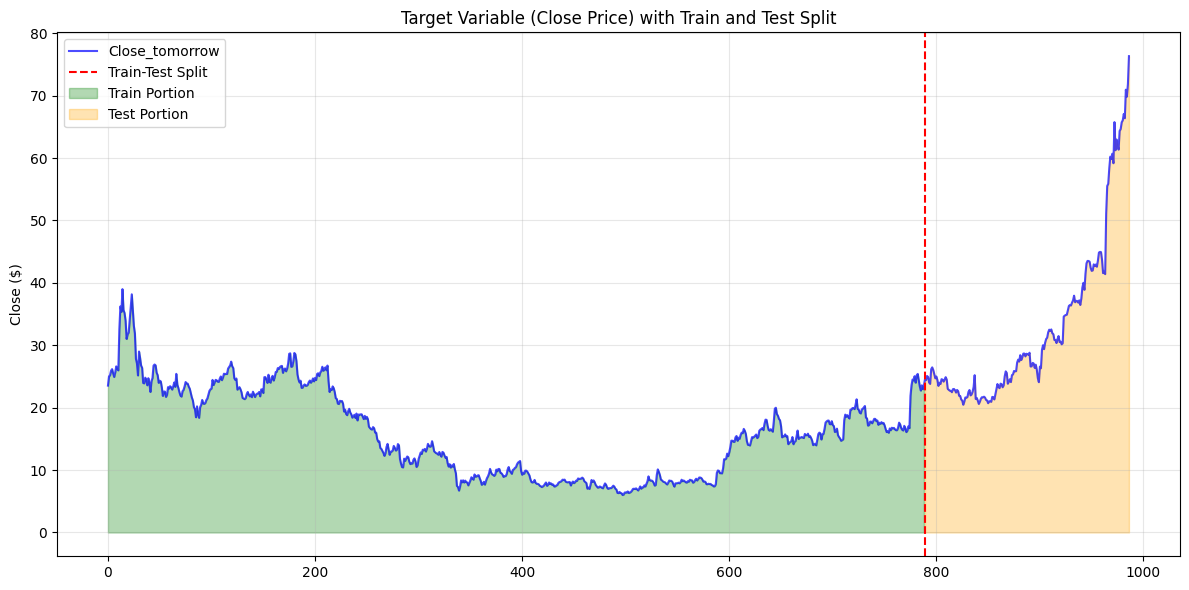

In [16]:
# Plot the target variable
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label=y_col, color='blue', alpha=0.7)
plt.axvline(train_size, color='red', linestyle='--', label='Train-Test Split')

# Highlight train and test portions
plt.fill_between(range(len(y)), y, where=(np.arange(len(y)) < train_size), color='green', alpha=0.3, label='Train Portion')
plt.fill_between(range(len(y)), y, where=(np.arange(len(y)) >= train_size), color='orange', alpha=0.3, label='Test Portion')

# Add labels, legend, and title
plt.title('Target Variable (Close Price) with Train and Test Split')
plt.ylabel('Close ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Explanation of the Code for below  1) Naive Rolling Average

This Python code snippet visualizes the target variable (y, typically Close_tomorrow) alongside a naive prediction using a 50-day moving average (Close_MA50). It highlights the train-test split to indicate the separation of training and testing data.

# 1. Plot Setup

#plt.figure(figsize=(12, 6))

Creates a figure with dimensions 12 x 6 inches for better visualization.


# 2. Plot the Target Variable

plt.plot(range(len(y)), y, label=y_col, color='blue', alpha=0.7)

range(len(y)):

Generates the x-axis values as indices corresponding to the rows in y.

y:
The target variable, which represents the actual closing price for the next day (Close_tomorrow).

label=y_col:
Sets the label for the line in the legend (e.g., Close_tomorrow).

color='blue':
The line color.

alpha=0.7:
Sets the line's transparency, making it visually clear while not overpowering other elements.


# 3. Plot the 50-Day Moving Average

#plt.plot(range(len(y)), X['Close_MA50'], label='Close_MA50', color='green', alpha=0.7)

X['Close_MA50']:
Represents the 50-day moving average of the closing prices (Close_MA50), which is a smoothed version of the Close values.

Acts as a naive prediction model for the closing price.

label='Close_MA50':
Adds a label for the moving average line in the legend.

color='green':
Sets the line color to green.

alpha=0.7:
Adds transparency for better layering.


# 4. Highlight the Train-Test Split

#plt.axvline(train_size, color='red', linestyle='--', label='Train-Test Split')

plt.axvline(train_size):
Draws a vertical line at the index corresponding to train_size, which marks the boundary between training and testing sets.

color='red':
Sets the line color to red.

linestyle='--':
Sets the line style to dashed.

label='Train-Test Split':
Adds a label for the split in the legend.

# 5. Add Labels, Title, and Legend

#plt.title('50-Day Moving Average Prediction')

Sets the title of the plot to indicate it visualizes predictions using the 50-day moving average.

#plt.ylabel('Price ($)')

Labels the y-axis to indicate it represents prices in dollars.

#plt.legend()

Adds a legend to identify the target variable (Close_tomorrow), the 50-day moving average, and the train-test split marker.


# 6. Add Grid and Adjust Layout

#plt.grid(alpha=0.3)

Adds a grid to the plot for improved readability, with a transparency of 0.3.

#plt.tight_layout()

Automatically adjusts subplot parameters to ensure everything fits within the figure.



# Use Case
Model Comparison:

The plot allows comparison of the naive rolling average (Close_MA50) with the actual target variable (Close_tomorrow).
Helps assess how well the moving average captures the overall trend in the data.
Trend Analysis:

The moving average smooths out short-term fluctuations, highlighting long-term trends in the stock price.
Performance Baseline:

The naive prediction using a rolling average provides a simple baseline model against which more complex predictive models can be compared.

# Visualization Description

Blue Line: Represents the actual target variable (Close_tomorrow), showing the actual price movements.
    
Green Line: Represents the 50-day moving average (Close_MA50), smoothing price fluctuations.
    
Red Dashed Line: Marks the boundary between the training and testing data.
    
Legend: Helps identify each component in the plot.
    
Title and Labels: Provide context for the chart.

### Forecast Approach 1) Naive Rolling Average
A simple baseline approach where predictions are based on rolling averages of historical data. This helps establish a benchmark for evaluating more advanced models.

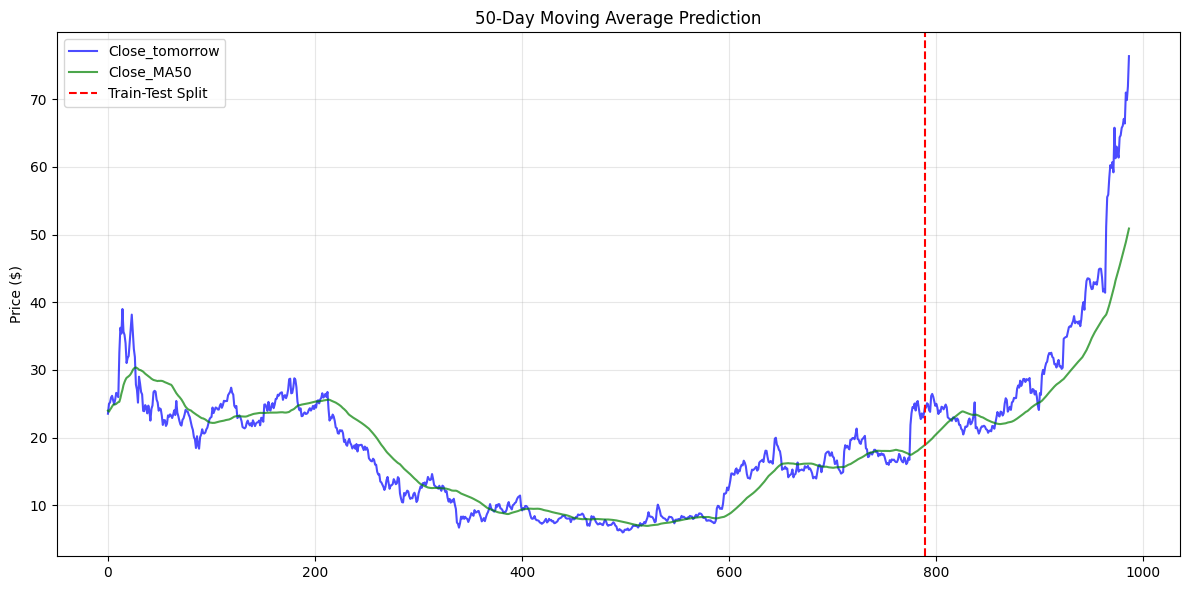

In [17]:
# Plot the target variable
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label=y_col, color='blue', alpha=0.7)
plt.plot(range(len(y)), X['Close_MA50'], label='Close_MA50', color='green', alpha=0.7)
plt.axvline(train_size, color='red', linestyle='--', label='Train-Test Split')

# Add labels, legend, and title
plt.title('50-Day Moving Average Prediction')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

#### Define function to compute our scoring metrics
For regression tasks, there are various scoring metrics like Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) to measure how close predictions are to actual values.

FOr stock prices, we typically care about relative error (in terms of %) - for that reason, we will use Mean Absolute Percent Error (MAPE) to evaluate models.

# Explanation of the Code - compute_mape

This Python code defines a function to calculate the Mean Absolute Percentage Error (MAPE), a metric commonly used to evaluate the accuracy of forecasting models.
It then applies this function to evaluate the prediction accuracy of the 50-day moving average (Close_MA50) as a naive forecasting model.

# 1. Import Required Library

#import numpy as np

Imports the numpy library for numerical computations, such as array manipulation and mathematical operations.


# 2. Define the compute_mape Function
#def compute_mape(y_true, y_pred):

Defines a function to calculate Mean Absolute Percentage Error (MAPE).
y_true: The actual true values (e.g., real closing prices).
y_pred: The predicted values (e.g., 50-day moving average predictions).

#y_true = np.array(y_true)
#y_pred = np.array(y_pred)

Converts the input data into NumPy arrays to ensure compatibility with NumPy's efficient mathematical operations.

#mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

(y_true - y_pred): Computes the difference between the true and predicted values.

np.abs(): Takes the absolute value of the difference to avoid negative errors canceling out.

/ y_true: Divides by the true values to normalize the errors as a percentage of the actual value.

np.mean(): Averages the normalized absolute errors across all data points.

* 100: Converts the result into a percentage format.

#return mape

Returns the computed MAPE value.




# 3. Evaluate the 50-Day Moving Average

#y_pred = X_test['Close_MA50']
#y_true = y_test

y_pred: The predictions, taken as the Close_MA50 column (50-day moving average) from the test set.

y_true: The actual target variable (Close_tomorrow) for the test set.


# 4. Compute MAPE

mape = compute_mape(y_true, y_pred)

Calls the compute_mape function to compute the MAPE between the true values (y_true) and predictions (y_pred).


# 5. Print MAPE

#print(f"MAPE for 50-day Moving Average: {mape:.2f}%")

Prints the computed MAPE with two decimal places.

Example Output: MAPE for 50-day Moving Average: 12.34%


# Use Case

MAPE in Forecasting

MAPE quantifies how far the predictions deviate from the true values on average, expressed as a percentage. It is particularly useful in:

Performance Evaluation:
Helps assess the accuracy of forecasting models (e.g., naive models, moving averages).

Comparison:
Allows for easy comparison across models or datasets because it is unitless.

Interpreting MAPE
Low MAPE (<10%): Highly accurate prediction.

Moderate MAPE (10-20%): Good prediction.

High MAPE (>20%): Poor prediction, indicating room for model improvement.



# Example Usage in the Code

This code evaluates how well the 50-day moving average (Close_MA50) predicts the target variable (Close_tomorrow).

If MAPE is high, it suggests the naive moving average model is not very accurate and a more sophisticated forecasting model is needed.

In [18]:
# For instruction purposes, lets compute MAPE ourselves
import numpy as np

def compute_mape(y_true, y_pred):
    """
    Compute Mean Absolute Percentage Error (MAPE).

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    mape (array-like): mape is the Mean Absolute Percentage Error (in percentage)
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute MAPE, handling division by zero
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mape

y_pred = X_test['Close_MA50']
y_true = y_test
mape = compute_mape(y_true, y_pred)
print(f"MAPE for 50-day Moving Average: {mape:.2f}%")

## You can also use sklearn's built-in implementation:
# from sklearn.metrics import mean_absolute_percentage_error
# mape = mean_absolute_percentage_error(y_true, y_pred) * 100


MAPE for 50-day Moving Average: 14.03%


# Explanation of the Code - Regression

This Python code implements a regression task using the RandomForestRegressor model from the scikit-learn library. It trains the model on a training dataset and generates predictions for both the training and test datasets.

# 1. Importing the RandomForestRegressor

#from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor:

A regression algorithm based on ensemble learning.

Combines multiple decision trees (a "forest") to improve prediction accuracy.

Each tree is trained on a random subset of the data (a process called bagging).

The final prediction is obtained by averaging the predictions of all the individual trees.


# 2. Instantiating the Model

#model = RandomForestRegressor()

Creates an instance of the RandomForestRegressor with default hyperparameters.

Common hyperparameters you might tune:

n_estimators: The number of trees in the forest (default = 100).

max_depth: The maximum depth of each tree (default = None, meaning nodes are expanded until all leaves are pure).

random_state: Controls the randomness for reproducibility.

min_samples_split and min_samples_leaf: Control how splits and leaves are formed during training.



# 3. Training the Model

model.fit(X_train, y_train)

X_train: The training feature set (input data).

y_train: The training target variable (output/labels).

The model learns patterns in the data by building multiple decision trees and optimizing their collective performance.

# 4. Making Predictions

For Training Data

#train_predictions = model.predict(X_train)

Generates predictions for the training dataset using the trained model.

Why predict on training data?

To assess how well the model fits the training data (risk of overfitting).

For Test Data

test_predictions = model.predict(X_test)
Generates predictions for the test dataset (unseen data).

Why predict on test data?

To evaluate the model's generalization ability and predictive performance on new, unseen data.


# Why Use Random Forest for Regression?

Handles Non-Linearity:
    
Can model complex relationships between input features and the target variable.

Robust to Noise:
Reduces overfitting due to averaging across multiple trees.

Feature Importance:
Provides a ranking of features based on their importance in making predictions.

Example Applications:
Predicting stock prices or market trends.

Forecasting real estate prices.

Estimating sales or customer behavior metrics.

# Next Steps

Evaluate Performance:

Use metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R² (coefficient of determination) to assess accuracy:


#from sklearn.metrics import mean_squared_error, r2_score
#train_mse = mean_squared_error(y_train, train_predictions)
#test_mse = mean_squared_error(y_test, test_predictions)
#print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

Hyperparameter Tuning:

Use techniques like grid search or random search to optimize model parameters for better performance:

#from sklearn.model_selection import GridSearchCV
#param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
#grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
#grid_search.fit(X_train, y_train)
#print("Best Parameters:", grid_search.best_params_)

Feature Importance Analysis:

Identify which features have the most impact on the predictions

#importance = model.feature_importances_
#feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
#print(feature_importance.sort_values(by='Importance', ascending=False))



### Forecast Approach 2) Regression
Regression models utilize additional features to predict future stock prices. We'll explore linear regression and other variations for this task.

In [19]:
# [Naive implementation] Train and evaluate the Random Forest model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Explanation of the Code

This Python code analyzes the importance of features in a trained Random Forest model (RandomForestRegressor) by calculating their contribution to model predictions.
It displays the feature importances in a sorted format and visualizes them using a horizontal bar chart.

# 1. Retrieve Feature Importances

#feature_importances = model.feature_importances_

model.feature_importances_:

A property of the trained RandomForestRegressor model.

Contains an array of values where each value represents the importance of a feature used in the training process.

Higher values indicate that the feature contributed more to the model's decisions.


# 2. Pair Feature Names with Their Importances

#feature_importance_dict = dict(zip(X_train.columns, feature_importances))

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

X_train.columns:
The feature names used to train the model.

zip(X_train.columns, feature_importances):
Pairs each feature name with its corresponding importance value.

dict():
Converts the paired data into a dictionary, where keys are feature names, and values are their importance scores.



# 3. Sort Features by Importance

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

feature_importance_dict.items():
Converts the dictionary into a list of tuples (feature_name, importance).

sorted():
Sorts the list based on the second element of each tuple (importance score).

key=lambda x: x[1]:
Specifies the sorting key as the second element of the tuple (importance).

reverse=True:
Ensures the list is sorted in descending order of importance.


# 4. Create a DataFrame for Display

#feature_importance_df = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])

Converts the sorted feature-importance pairs into a DataFrame for easier analysis and visualization.

# 5. Plot Feature Importances

#plt.figure(figsize=(12, 6))
#plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.barh():
Creates a horizontal bar chart.
feature_importance_df['Feature']: The feature names are used as labels on the y-axis.
feature_importance_df['Importance']: The importance scores are used as the bar lengths.


#plt.xlabel('Importance')
#plt.ylabel('Feature')
#plt.title('Feature Importance')
#plt.show()

Adds labels and a title for clarity.
plt.show(): Displays the plot.

# Interpretation

Understanding Feature Importances:

Features with higher importance values had a greater impact on model predictions.
This helps identify which variables are most significant in predicting the target variable.

Use Cases:

Feature Selection: You can remove low-importance features to simplify the model.
Insights: Provides domain insights by showing which variables are most predictive.

Caveats:

Feature importance is relative; its values sum to 1.
Correlated features may share importance, so interpretation must consider multicollinearity.

Train MAPE for Random Forest: 1.29%
Test MAPE for Random Forest: 9.54%


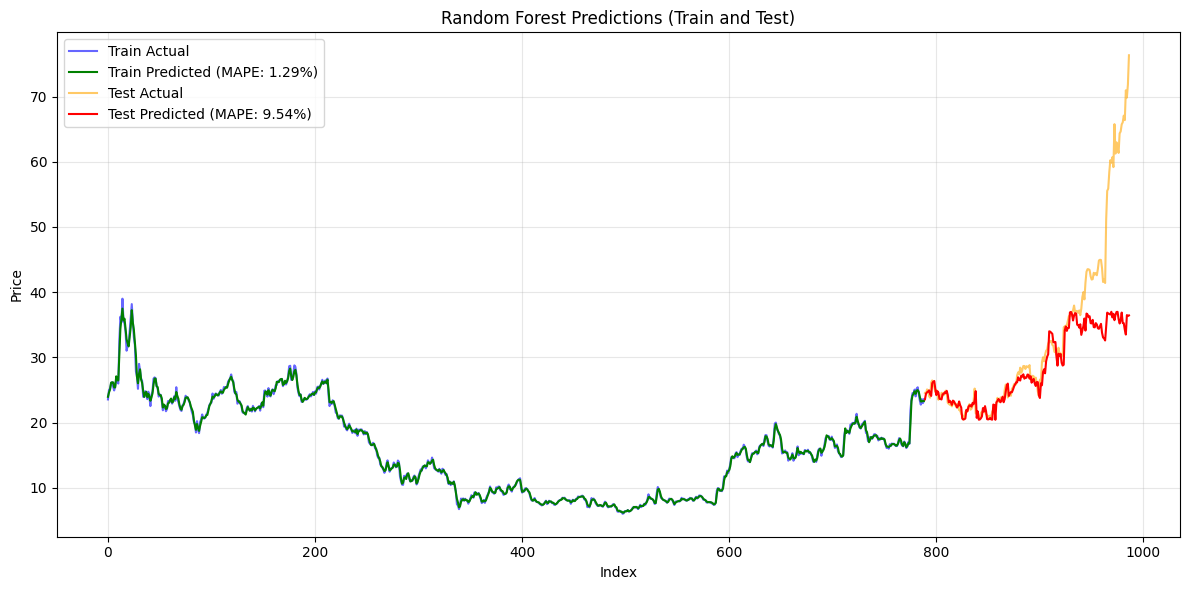

In [20]:
# compute MAPE
train_mape = compute_mape(y_train, train_predictions)
test_mape = compute_mape(y_test, test_predictions)
print(f"Train MAPE for Random Forest: {train_mape:.2f}%")
print(f"Test MAPE for Random Forest: {test_mape:.2f}%")

# Plot train data
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label="Train Actual", color="blue", alpha=0.6)
plt.plot(range(len(y_train)), train_predictions, label=f"Train Predicted (MAPE: {train_mape:.2f}%)", color="green")

# Plot test data
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Test Actual", color="orange", alpha=0.6)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predictions, label=f"Test Predicted (MAPE: {test_mape:.2f}%)", color="red")

# Add labels, legend, and title
plt.title("Random Forest Predictions (Train and Test)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

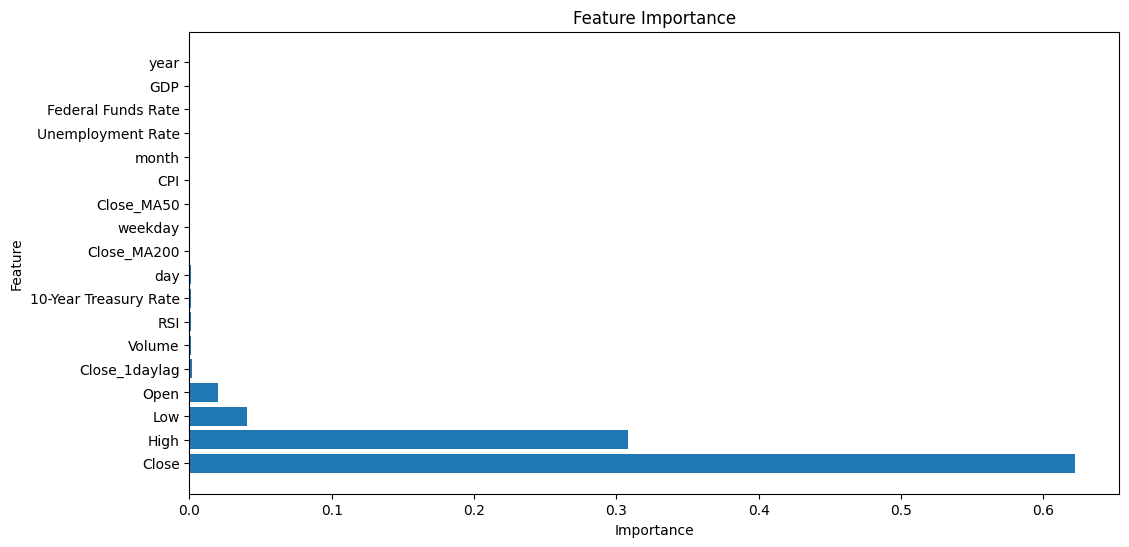

In [21]:
# What is driving our model predictions? View feature importance
feature_importances = model.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importances
import pandas as pd
feature_importance_df = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])

# bar chart of feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Forecast Approach 3) Prophet Forecasting
Prophet, developed by Facebook, is a robust forecasting tool that handles seasonality and trend shifts. It’s particularly useful for time-series data like stock prices.

In [23]:
!pip install Prophet



# Explanation of the Code - Prophet

This Python code uses the Facebook Prophet library for time series forecasting.
It prepares the data, sets up the Prophet model, adds exogenous regressors, splits the data into training and testing sets, and fits the model to the training data.

# 1. Importing Prophet

from prophet import Prophet

Prophet:

A forecasting tool developed by Facebook for time series data.

Handles trends, seasonality, and holidays in the data.

Flexible and suitable for business-related time series like sales forecasting, stock predictions, etc.


# 2. Preparing Prophet-Compatible Data


#prophet_data = data[['Date', y_col] + X_cols].rename(columns={'Date': 'ds', y_col: 'y'})

Prophet requires specific column names:

ds: Date column.

y: Target variable (what you want to forecast).

X_cols: Additional features (exogenous regressors) that may influence the target variable.


#prophet_data = prophet_data.dropna()
#prophet_data.reset_index(drop=True, inplace=True)

dropna(): Removes rows with missing values, ensuring clean data for modeling.

reset_index(drop=True): Resets the index after filtering, which is useful for aligning data.

# 3. Initializing the Prophet Model

#model = Prophet()

Prophet(): Creates an instance of the Prophet model with default parameters.

You can customize the model by adding parameters like:

seasonality_mode ('additive' or 'multiplicative').

holidays: To account for holiday effects.


# 4. Adding Exogenous Regressors

#for col in X_cols:
# model.add_regressor(col)


Exogenous Regressors:
Additional variables (from X_cols) that may affect the target variable.

For example, macroeconomic indicators like GDP, unemployment rate, or technical indicators like RSI.

add_regressor():
Tells Prophet to include these variables in the forecasting model.



# 5. Splitting Data into Training and Testing Sets

#train_size = int(0.8 * len(prophet_data))
#train_data = prophet_data[:train_size]
#test_data = prophet_data[train_size:]

Splits the dataset into training (80%) and testing (20%) sets for evaluation.

Training Data (train_data): Used to fit the model.

Testing Data (test_data): Used to validate the model’s performance on unseen data.


# 6. Fitting the Model

#model.fit(train_data)

fit():
Trains the Prophet model using the training dataset.

Learns patterns in the target variable (y) as a function of time (ds) and the added regressors.



# How Prophet Works

Trend:
Models long-term increase or decrease in the target variable.

Seasonality:
Captures recurring patterns in the data (e.g., yearly, monthly).

Regressors:
Incorporates external factors (e.g., macroeconomic indicators) that influence the forecast.

# Output

After fitting, the model is ready to make forecasts and evaluate performance on the test dataset.

You can predict future values using:

#future = model.make_future_dataframe(periods=30)  # Generate 30 future dates
#for col in X_cols:
#    future[col] = test_data[col]  # Add regressor values for future dates
#forecast = model.predict(future)



# Advantages of Prophet with Regressors

Improved Forecast Accuracy:

By including external factors, you capture additional variability.

Interpretability:

Easily interpretable trends, seasonality, and regressor effects.

Flexibility:

Handles missing data and irregular time intervals effectively.

In [24]:
from prophet import Prophet

# Create Prophet-compatible dataframe
prophet_data = data[['Date', y_col] + X_cols].rename(columns={'Date': 'ds', y_col: 'y'})
prophet_data = prophet_data.dropna()
prophet_data.reset_index(drop=True, inplace=True)

# Initialize the Prophet model and add exogenous regressors
model = Prophet()
for col in X_cols:
    model.add_regressor(col)

# Split data into train and test sets
train_size = int(0.8 * len(prophet_data))
train_data = prophet_data[:train_size]
test_data = prophet_data[train_size:]

# Fit the model on training data
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52ey4kit/l7lppp1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp52ey4kit/fmq18p4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69903', 'data', 'file=/tmp/tmp52ey4kit/l7lppp1c.json', 'init=/tmp/tmp52ey4kit/fmq18p4_.json', 'output', 'file=/tmp/tmp52ey4kit/prophet_modelomffeom4/prophet_model-20241210203929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
prophet_data

,ds,y,Close,Open,High,Low,Volume,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate,RSI,Close_1daylag,Close_MA50,Close_MA200,year,month,day,weekday
0,2021-01-05,23.540001,24.600000,23.180000,24.670000,22.889999,29050400,22656.793,6.4,262.518,0.09,0.96,100.000000,23.370001,23.985001,23.985001,2021,1,5,1
1,2021-01-06,25.000000,23.540001,24.120001,24.459999,23.250000,32732900,22656.793,6.4,262.518,0.09,1.04,53.711794,24.600000,23.836667,23.836667,2021,1,6,2
2,2021-01-07,25.200001,25.000000,24.020000,25.190001,23.670000,32240000,22656.793,6.4,262.518,0.09,1.08,71.733333,23.540001,24.127501,24.127501,2021,1,7,3
3,2021-01-08,25.930000,25.200001,25.700001,26.440001,24.700001,41313800,22656.793,6.4,262.518,0.09,1.13,73.164563,25.000000,24.342001,24.342001,2021,1,8,4
4,2021-01-11,26.180000,25.930000,24.610001,26.600000,24.309999,32609000,22656.793,6.4,262.518,0.09,1.15,77.350431,25.200001,24.606667,24.606667,2021,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2024-11-29,66.389999,67.080002,65.889999,67.160004,65.470001,30104000,29354.321,4.2,315.454,4.64,4.18,67.541383,66.050003,48.282600,31.345400,2024,11,29,4
983,2024-12-02,70.959999,66.389999,67.440002,67.879997,65.959999,46405000,29354.321,4.2,315.454,4.64,4.19,63.024135,67.080002,48.866400,31.550300,2024,12,2,0
984,2024-12-03,69.849998,70.959999,66.410004,71.370003,66.150002,100751400,29354.321,4.2,315.454,4.64,4.23,69.989205,66.389999,49.526600,31.782900,2024,12,3,1
985,2024-12-04,71.870003,69.849998,71.129997,71.180000,67.279999,86284800,29354.321,4.2,315.454,4.64,4.19,66.310157,70.959999,50.185600,32.015150,2024,12,4,2


# EXPLANATION OF BELOW

This Python code prepares a future DataFrame for the Prophet model,
aligning it with the test data and ensuring that exogenous features (regressors) are incorporated. Here's a detailed explanation of each step:

# 1. Identifying Date Ranges

#last_train_date = prophet_data['ds'].iloc[train_size - 1]
#last_test_date = test_data['ds'].iloc[-1]

last_train_date: The last date in the training dataset.

Used to determine the starting point for future predictions.

last_test_date: The last date in the testing dataset.

Represents the end of the period we want to predict.


# 2. Calculating the Forecasting Horizon

#periods = (last_test_date - last_train_date).days

periods:

The number of days between the last training date and the last testing date.

Indicates how many future periods (days) the model should forecast.



# 3. Creating a Future DataFrame
future = model.make_future_dataframe(periods=periods, freq='D')

make_future_dataframe():

Generates a DataFrame with dates starting from the end of the training data and extending periods days into the future.

The freq='D' argument ensures daily granularity.


# 4. Aligning Future Dates with Test Data

#dates = set(prophet_data['ds'])
#future = future[future['ds'].isin(dates)]
#future.reset_index(drop=True, inplace=True)


Filter for Existing Dates:

prophet_data['ds']: Contains all dates in the original dataset.

Filters the future DataFrame to retain only those dates that exist in the original data.

This is useful when the test dataset only includes certain dates (e.g., weekdays).

Reset Index:

Ensures the DataFrame's index is reset after filtering.

# 5. Adding Exogenous Features (Regressors)

for col in X_cols:
    future[col] = prophet_data[col]
    
#Adding Regressors:

#The future DataFrame needs the same exogenous variables (regressors) as the training data.
#Copies the regressor values from the original prophet_data DataFrame.





# Output

The future DataFrame now includes:

Dates (ds):

Aligned with the test data.

Exogenous Variables (X_cols):
Features used during training, ready for prediction.

# Why This is Necessary

Prophet requires a future DataFrame to make predictions.

The future DataFrame must include:
Dates to Predict.

Values of Regressors for Each Date:
Ensures consistency between training and prediction.

# Next Steps

Make Predictions:
forecast = model.predict(future)

The forecast DataFrame will include predictions (yhat) and components like trend, seasonality, and regressor effects.
Evaluate Performance:

Compare predictions (yhat) against actual values (y) in the test data.

In [26]:
# Define the last date in the training data and the test data
last_train_date = prophet_data['ds'].iloc[train_size - 1]
last_test_date = test_data['ds'].iloc[-1]

# Calculate the number of days to forecast (periods)
periods = (last_test_date - last_train_date).days

future = model.make_future_dataframe(periods=periods, freq='D')
dates = set(prophet_data['ds'])
future = future[future['ds'].isin(dates)]
future.reset_index(drop=True, inplace=True)

# Add exogenous features to the future dataframe
for col in X_cols:
    future[col] = prophet_data[col]

future

,ds,Close,Open,High,Low,Volume,GDP,Unemployment Rate,CPI,Federal Funds Rate,10-Year Treasury Rate,RSI,Close_1daylag,Close_MA50,Close_MA200,year,month,day,weekday
0,2021-01-05,24.600000,23.180000,24.670000,22.889999,29050400,22656.793,6.4,262.518,0.09,0.96,100.000000,23.370001,23.985001,23.985001,2021,1,5,1
1,2021-01-06,23.540001,24.120001,24.459999,23.250000,32732900,22656.793,6.4,262.518,0.09,1.04,53.711794,24.600000,23.836667,23.836667,2021,1,6,2
2,2021-01-07,25.000000,24.020000,25.190001,23.670000,32240000,22656.793,6.4,262.518,0.09,1.08,71.733333,23.540001,24.127501,24.127501,2021,1,7,3
3,2021-01-08,25.200001,25.700001,26.440001,24.700001,41313800,22656.793,6.4,262.518,0.09,1.13,73.164563,25.000000,24.342001,24.342001,2021,1,8,4
4,2021-01-11,25.930000,24.610001,26.600000,24.309999,32609000,22656.793,6.4,262.518,0.09,1.15,77.350431,25.200001,24.606667,24.606667,2021,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2024-11-29,67.080002,65.889999,67.160004,65.470001,30104000,29354.321,4.2,315.454,4.64,4.18,67.541383,66.050003,48.282600,31.345400,2024,11,29,4
983,2024-12-02,66.389999,67.440002,67.879997,65.959999,46405000,29354.321,4.2,315.454,4.64,4.19,63.024135,67.080002,48.866400,31.550300,2024,12,2,0
984,2024-12-03,70.959999,66.410004,71.370003,66.150002,100751400,29354.321,4.2,315.454,4.64,4.23,69.989205,66.389999,49.526600,31.782900,2024,12,3,1
985,2024-12-04,69.849998,71.129997,71.180000,67.279999,86284800,29354.321,4.2,315.454,4.64,4.19,66.310157,70.959999,50.185600,32.015150,2024,12,4,2


# EXPLAIN MODEL PREDICT BELOW:



The line forecast = model.predict(future) is used to generate predictions using the Prophet model for the dates and features specified in the future DataFrame.
    

# Detailed Explanation

1. Input: future DataFrame
What is future?

A DataFrame containing:
ds (dates): The dates for which predictions are required.
Regressors (if any): Exogenous features added during training.
Why is future needed?

Prophet uses it to:
Forecast the target variable (y).
Account for the influence of any regressors provided.

# 2. The predict() Method
What does it do?

Generates predictions (yhat) for the dates in the future DataFrame.
Decomposes the forecast into components such as:
Trend: Long-term growth or decline.
Seasonality: Repeating patterns (e.g., yearly, weekly).
Regressor Effects: Impact of external variables on the target.
How does it work?

The model applies the patterns it learned during training to predict values for the specified dates.
If regressors are included, their values in future influence the predictions.

# 3. Output: forecast DataFrame
What is forecast?

A DataFrame containing predictions and additional details for each date in the future DataFrame.
Key Columns in forecast:

ds: The date corresponding to each prediction.
yhat: The predicted value of the target variable.
yhat_lower and yhat_upper: Prediction intervals (uncertainty bounds).
Trend and Seasonality Components:
trend: The underlying trend component.
additive_terms or multiplicative_terms: Combined seasonal and regressor effects.
Individual Regressors: Contribution of each external variable.

# Next Steps

Visualize Predictions:

#model.plot(forecast)

Evaluate Accuracy:

Compare forecast['yhat'] against actual values in your test dataset.

In [27]:
# forecast
forecast = model.predict(future)

# EXPLAINING CODE BELOW:

This code evaluates the Prophet model's performance by calculating the Mean Absolute Percentage Error (MAPE) for both training and testing datasets and visualizing the forecast results interactively. Here's a detailed explanation of each step:
    

# 1. Merge Predictions with Actual Data

#forecast = forecast.merge(prophet_data[['ds', 'y']], on='ds', how='left').dropna()

Purpose:
Combines the forecast DataFrame (which contains predictions) with the actual values (y) from prophet_data.

Ensures predictions (yhat) and actual values (y) are aligned by the ds (date) column.

dropna():
Removes rows with missing values (ensures valid data for MAPE calculation).



# 2. Separate Predictions for Train and Test Data

#train_predictions = forecast['yhat'][:train_size]
#test_predictions = forecast['yhat'][train_size:]

Train Predictions (train_predictions):
The predicted values (yhat) for the training period.

Test Predictions (test_predictions):
The predicted values (yhat) for the testing period.

train_size:
Used to split the DataFrame into train and test segments.


# 3. Compute MAPE (Mean Absolute Percentage Error)

#train_mape = compute_mape(forecast['y'][:train_size], train_predictions)
#test_mape = compute_mape(forecast['y'][train_size:], test_predictions)

compute_mape():
A custom function that calculates the MAPE:
MAPE
=
1
𝑛
∑
∣
𝑦
true
−
𝑦
pred
𝑦
true
∣
×
100
MAPE=
n
1
​
 ∑
​
  
y
true
​

y
true
​
 −y
pred
​

​
  
​
 ×100
Measures the prediction error as a percentage of the true value.
Purpose:
Quantifies the accuracy of predictions for both the training and testing periods.



# 4. Print MAPE Results

#print(f"Train MAPE for Prophet Model: {train_mape:.2f}%")
#print(f"Test MAPE for Prophet Model: {test_mape:.2f}%")

Displays the MAPE for both train and test sets.

Lower MAPE values indicate better predictive performance.


# 5. Visualize the Forecast

#from prophet.plot import plot_plotly

#plot_plotly(model, forecast)

plot_plotly():
Creates an interactive visualization of the forecast using Plotly.

Features:
Shows predicted values (yhat) along with actual values.

Includes uncertainty intervals (yhat_lower and yhat_upper).

Allows zooming and exploring the forecast interactively.


# visualization Insights
The plot will:
Show actual values (y) vs. predicted values (yhat).
Indicate periods with high/low uncertainty (using shaded confidence intervals).
Help identify patterns, anomalies, or areas of poor performance.

# Purpose of the Code
Evaluate Model Accuracy:
MAPE provides a quantitative measure of the model's performance.

Visualize Forecast Results:
Helps understand the alignment between predictions and actual values.

In [28]:
# compute MAPE
forecast = forecast.merge(prophet_data[['ds', 'y']], on='ds', how='left').dropna()
train_predictions = forecast['yhat'][:train_size]
test_predictions = forecast['yhat'][train_size:]

train_mape = compute_mape(forecast['y'][:train_size], train_predictions)
test_mape = compute_mape(forecast['y'][train_size:], test_predictions)
print(f"Train MAPE for Prophet Model: {train_mape:.2f}%")
print(f"Test MAPE for Prophet Model: {test_mape:.2f}%")

# Plot the results
from prophet.plot import plot_plotly

# Interactive forecast plot
plot_plotly(model, forecast)

Train MAPE for Prophet Model: 3.07%
Test MAPE for Prophet Model: 2.94%


# EXPLANATION OF CODE BELOW:

This code creates a time series plot to visually compare the actual values (true data) and the predicted values (model output) for both training and testing periods. Here's the explanation step by step:
    

# 1. Extract Actuals and Predictions

#train_actuals = forecast['y'][:train_size]
#test_actuals = forecast['y'][train_size:]
#train_predictions = forecast['yhat'][:train_size]
#test_predictions = forecast['yhat'][train_size:]

Purpose:

Splits the forecast DataFrame into training and testing subsets for both:
Actual values (y): True values from the dataset.

Predicted values (yhat): Predictions made by the Prophet model.

Key Variables:
train_actuals: True values during the training period.
test_actuals: True values during the testing period.
train_predictions: Model predictions during the training period.
test_predictions: Model predictions during the testing period.


# 2. Create a Figure

#plt.figure(figsize=(14, 7))

Purpose:

Sets up the size of the figure (14 units wide by 7 units tall).
Makes the visualization more readable.

# 3. Plot Training Actuals and Predictions

#plt.plot(forecast['ds'][:train_size], train_actuals, label='Train Actuals', linestyle='-', color='blue')
#plt.plot(forecast['ds'][:train_size], train_predictions, label='Train Predictions', linestyle='--', color='orange')

Training Period:
Actuals:
X-axis: Dates (ds column).
Y-axis: True values (y) from the training data.
Style: Solid line (linestyle='-'), blue color.
Predictions:
X-axis: Dates (ds column).
Y-axis: Predicted values (yhat) from the training data.
Style: Dashed line (linestyle='--), orange color.

# 4. Plot Testing Actuals and Predictions

#plt.plot(forecast['ds'][train_size:], test_actuals, label='Test Actuals', linestyle='-', color='green')
#plt.plot(forecast['ds'][train_size:], test_predictions, label='Test Predictions', linestyle='--', color='red')

Testing Period:

Actuals:
X-axis: Dates (ds column).

Y-axis: True values (y) from the testing data.

Style: Solid line (linestyle='-'), green color.

Predictions:

X-axis: Dates (ds column).

Y-axis: Predicted values (yhat) from the testing data.

Style: Dashed line (linestyle='--), red color.


# 5. Add Plot Customizations

#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.title('Prophet Model: Predictions vs Actuals')
#plt.legend()
#plt.grid(True)
#plt.show()

Labels:

Adds Date as the label for the X-axis.

Adds Value as the label for the Y-axis.

Title:

Describes the plot as "Prophet Model: Predictions vs Actuals."

Legend:

Displays a legend to distinguish lines:

Train Actuals, Train Predictions, Test Actuals, and Test Predictions.

Grid:

Adds a grid for better readability of the plot.


# Purpose of the Plot

Visual Evaluation:

Compares how well the model's predictions align with the actual data.

Separate visualization for the training period and the testing period.

Identify Trends or Issues:

Gaps between actuals and predictions indicate areas where the model underperforms.

Overlaps suggest high accuracy.

Model Assessment:

Useful for debugging or explaining the model's performance to stakeholders.


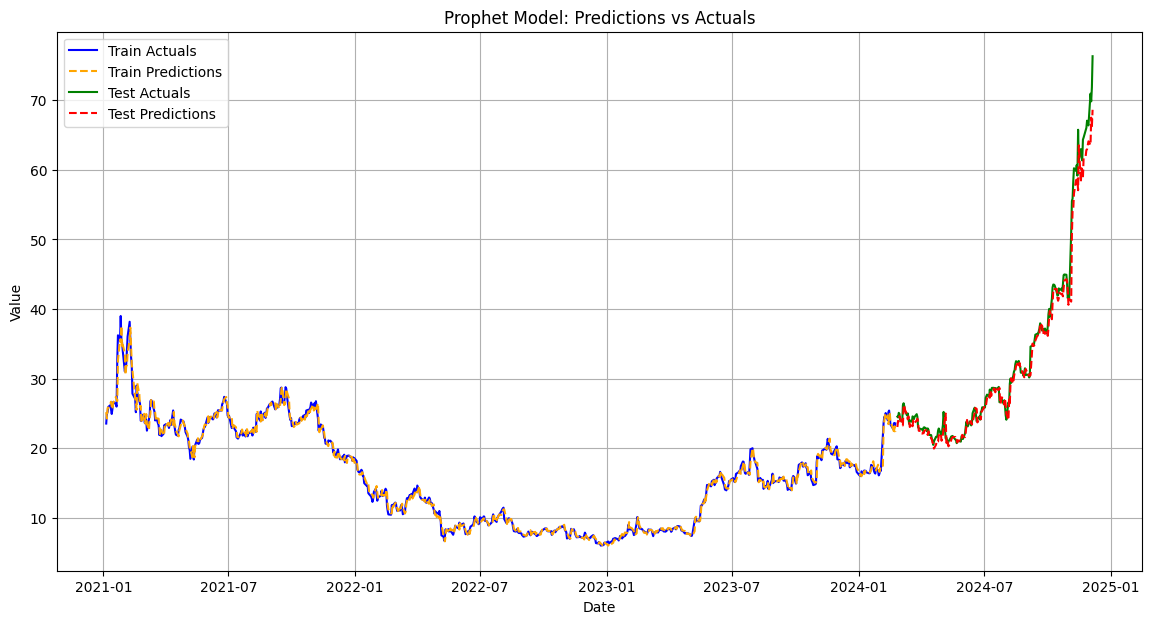

In [29]:
import matplotlib.pyplot as plt

# Extract actuals and predictions for train and test
train_actuals = forecast['y'][:train_size]
test_actuals = forecast['y'][train_size:]
train_predictions = forecast['yhat'][:train_size]
test_predictions = forecast['yhat'][train_size:]

# Create a plot
plt.figure(figsize=(14, 7))

# Plot train actuals vs. predictions
plt.plot(forecast['ds'][:train_size], train_actuals, label='Train Actuals', linestyle='-', color='blue')
plt.plot(forecast['ds'][:train_size], train_predictions, label='Train Predictions', linestyle='--', color='orange')

# Plot test actuals vs. predictions
plt.plot(forecast['ds'][train_size:], test_actuals, label='Test Actuals', linestyle='-', color='green')
plt.plot(forecast['ds'][train_size:], test_predictions, label='Test Predictions', linestyle='--', color='red')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model: Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()


# EXPLANATION OF CODE BELOW - plot_components

This code uses Prophet's component plotting functionality to visualize the decomposed components of the forecast. Here's a detailed explanation:

# 1. Import the Required Function

#from prophet.plot import plot_components

The plot_components function is part of Prophet's visualization tools.
It generates plots showing the individual components that contribute to the model's predictions.


# 2. Decompose the Forecast

#fig_components = model.plot_components(forecast)

Input:

model: The trained Prophet model object.

forecast: The DataFrame produced by model.predict(future) that contains predictions (yhat) and component contributions (e.g., trend, seasonality).

Output:
plot_components generates a figure (fig_components) that decomposes the time series forecast into its key components:

Trend:
Represents the long-term progression of the data.

Captures changes over time (e.g., growth or decline).

Seasonality:
Captures repeating patterns or cycles in the data, such as daily, weekly, or yearly fluctuations.

Prophet detects these patterns automatically based on the dataset.

Holidays (if included):
Shows the effect of specific holidays if these were added to the model.

# 3. Show the Plot

#plt.show()

Displays the generated components plot.

# Purpose of Component Plots

Understand the Drivers of Predictions:
Break down the forecast into trend, seasonality, and holiday effects for better interpretability.

Identify Patterns:
Helps identify whether the model correctly captures cyclical trends (e.g., weekly sales spikes) or any anomalies.

Model Diagnostics:
You can assess whether the trend and seasonal components make sense and align with the data.

# What the Plot Shows

Trend Component:
A smooth line showing the overall direction of the series (upward, downward, or flat).

Seasonal Components:
Separate plots for each seasonality detected (e.g., yearly or weekly).
Highlights periodic fluctuations in the data.

Holiday Effects (if applicable):
Shows the impact of specific holidays if custom holiday data was used.

# Example
If your time series has daily sales data, the components might show:

A long-term increasing trend in sales.

A weekly seasonal pattern with spikes on weekends.

A yearly seasonal pattern with peaks around major holidays like Christmas.


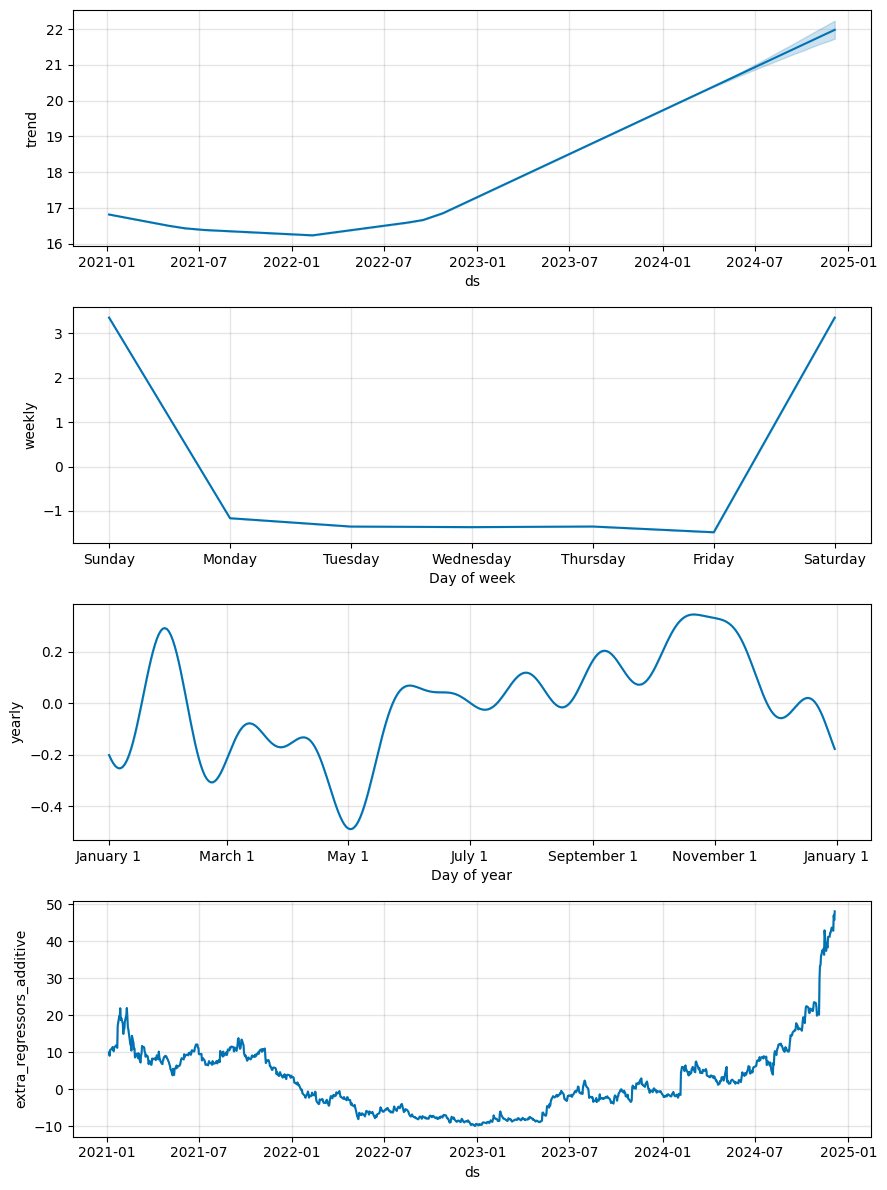

In [30]:
from prophet.plot import plot_components

# Plot decomposition of the forecast
fig_components = model.plot_components(forecast)
plt.show()

# EXPLANATION OF CODE BELOW  -for regressor

This code generates line plots to visualize the impact of each exogenous regressor (additional features) on the forecast. Here's an explanation of each part:

# 1. Import the Required Library

#import matplotlib.pyplot as plt

Matplotlib is used to create the plots.



# 2. Iterate Over Each Regressor

for regressor in X_cols:

    if regressor in forecast:
    
X_cols is the list of exogenous regressors (features) added to the Prophet model.

forecast is the DataFrame returned by the model.predict(future) function, which contains the forecast (yhat) and contributions from regressors and components.

The if regressor in forecast condition ensures the regressor has a calculated impact column in the forecast DataFrame.


# 3. Generate a Plot for Each Regressor

#plt.figure(figsize=(10, 5))

#plt.plot(forecast['ds'], forecast[regressor], label=f'Impact of {regressor}')

plt.figure(figsize=(10, 5)): Creates a figure with a specified size (10 inches wide, 5 inches tall).

plt.plot:

forecast['ds']: The date column from the forecast DataFrame (renamed from "Date" to "ds").

forecast[regressor]: The regressor's contribution to the forecast on each date.

label=f'Impact of {regressor}': Adds a label to the line plot.


# 4. Add Labels, Title, and Grid

#plt.title(f'Impact of {regressor} on Forecast')

#plt.xlabel('Date')

#plt.ylabel('Contribution')

#plt.legend()

#plt.grid()


plt.title: Specifies the title, showing which regressor's impact is being plotted.

plt.xlabel and plt.ylabel: Label the x-axis as "Date" and the y-axis as "Contribution" to indicate what the axes represent.

plt.legend(): Adds a legend to the plot, helping to identify the regressor being shown.

plt.grid(): Adds a grid for easier interpretation of values.

# 5. Show the Plot

#plt.show()


Displays the plot for the current regressor.

# What the Plots Show
Each plot visualizes how a specific exogenous regressor influences the forecast over time. The values in the y-axis represent the magnitude and direction of the regressor's contribution:


Positive Contribution: Indicates the regressor pushes the forecast up.

Negative Contribution: Indicates the regressor pulls the forecast down.

Time Variance: Shows how the impact of the regressor changes over time.


# Use Case

Model Interpretability: Understand how each external factor (e.g., macroeconomic indicators, weather, etc.) affects the forecasted values.

Diagnostics: Identify whether a regressor has consistent and meaningful contributions.

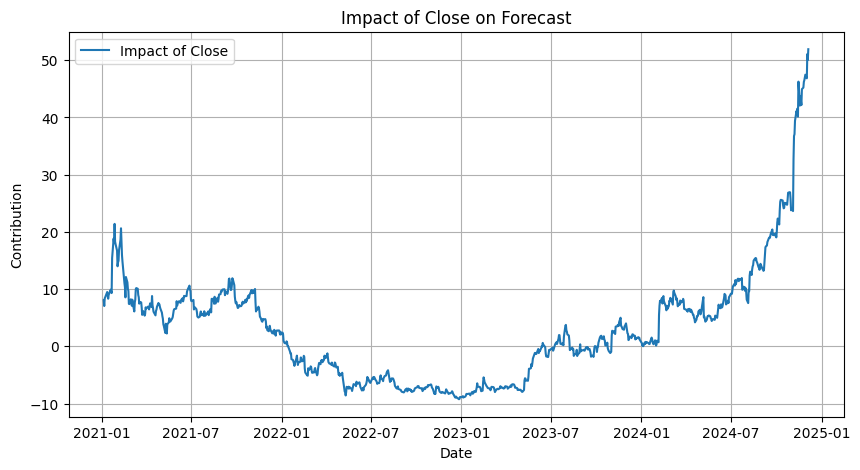

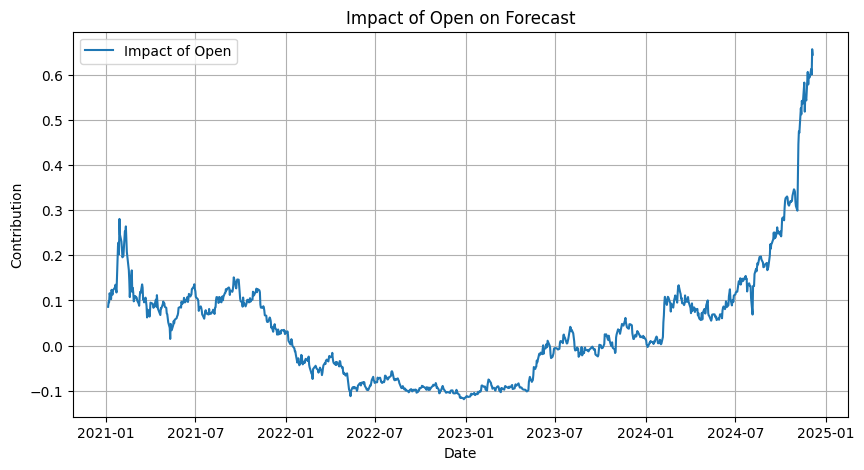

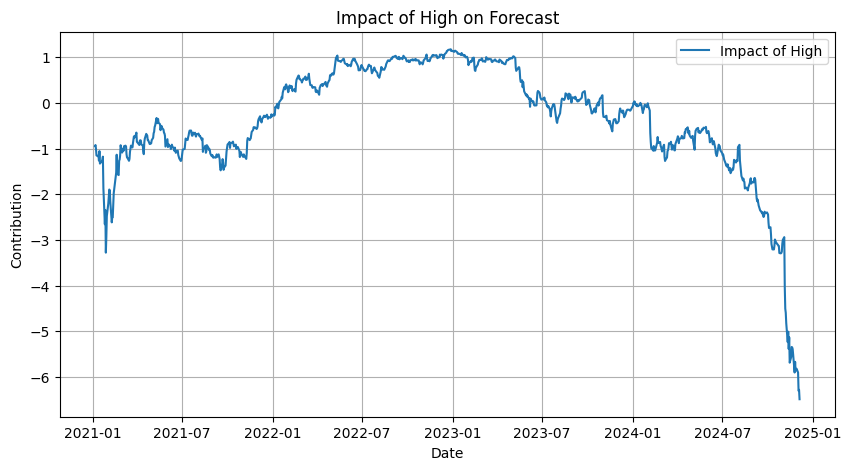

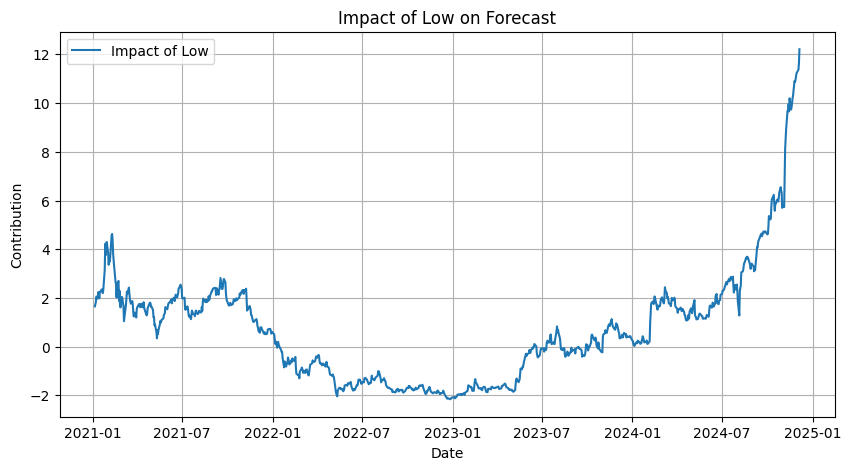

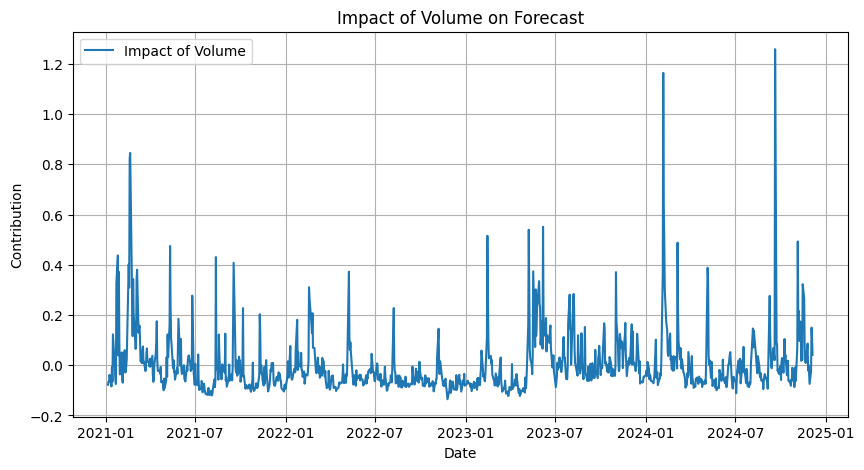

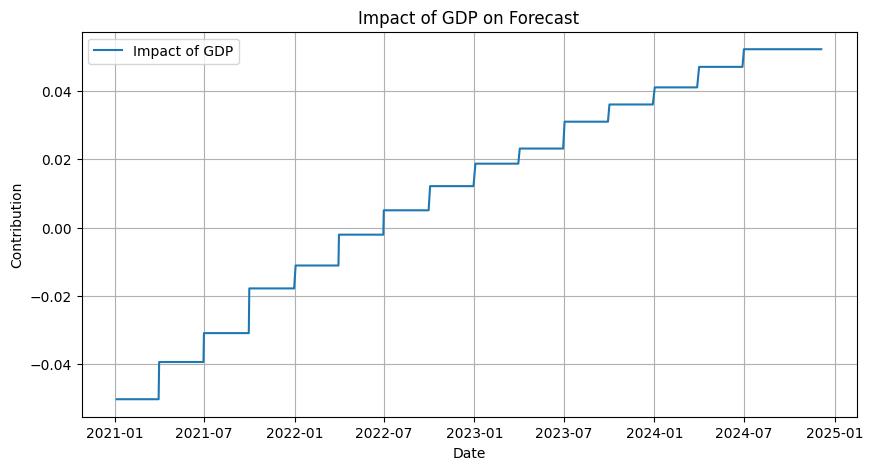

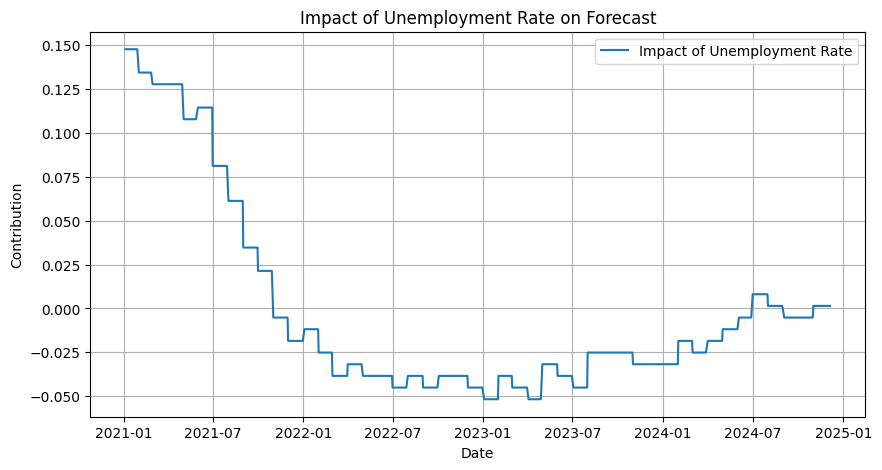

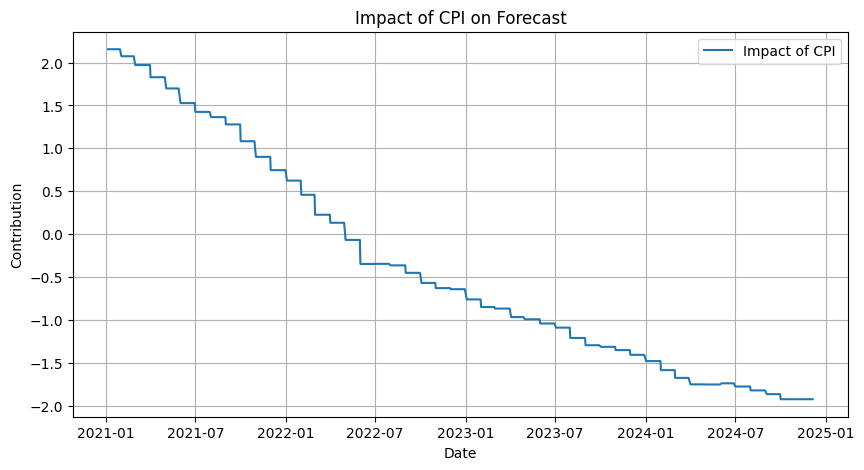

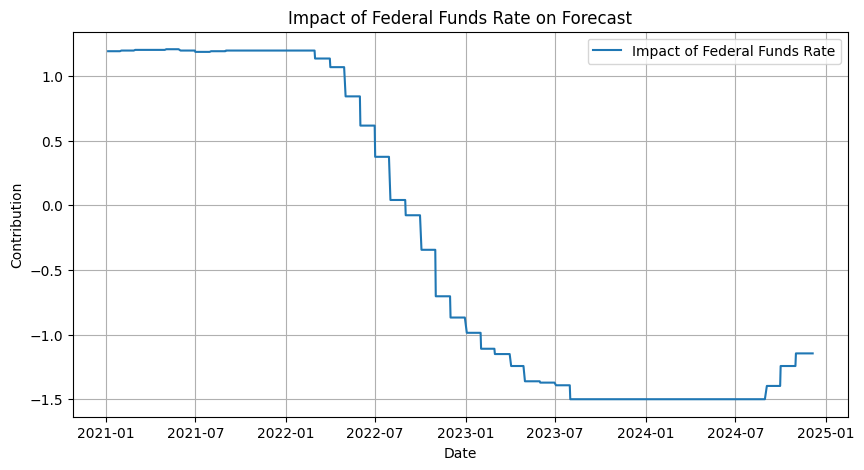

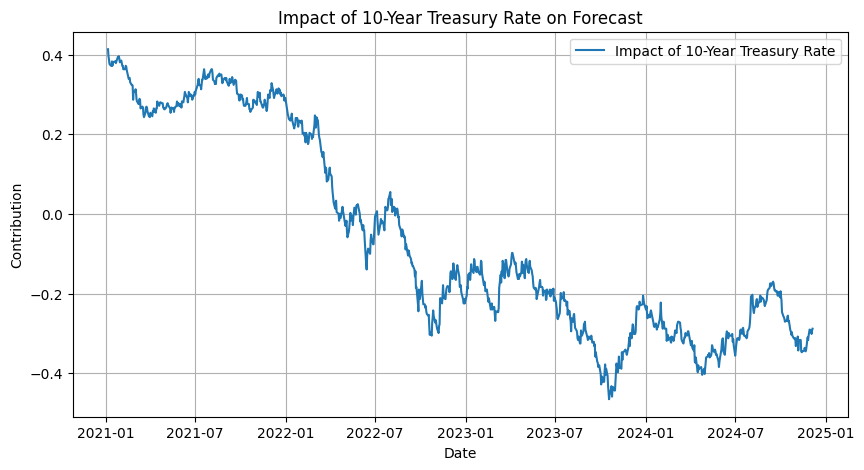

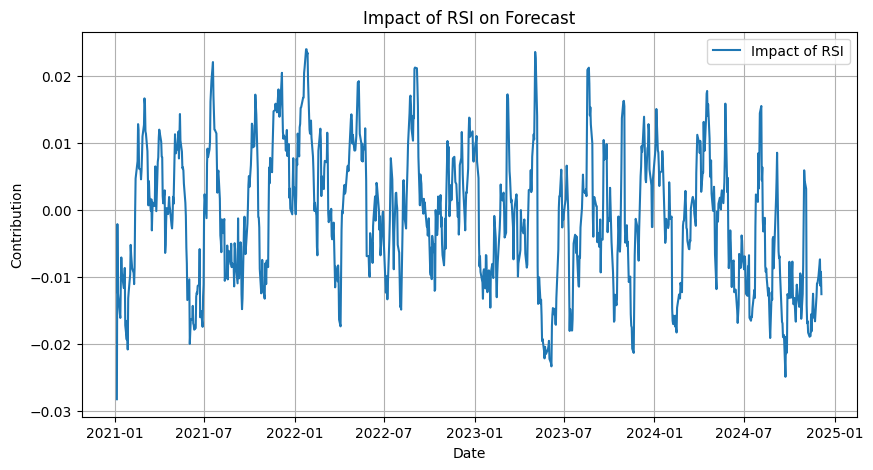

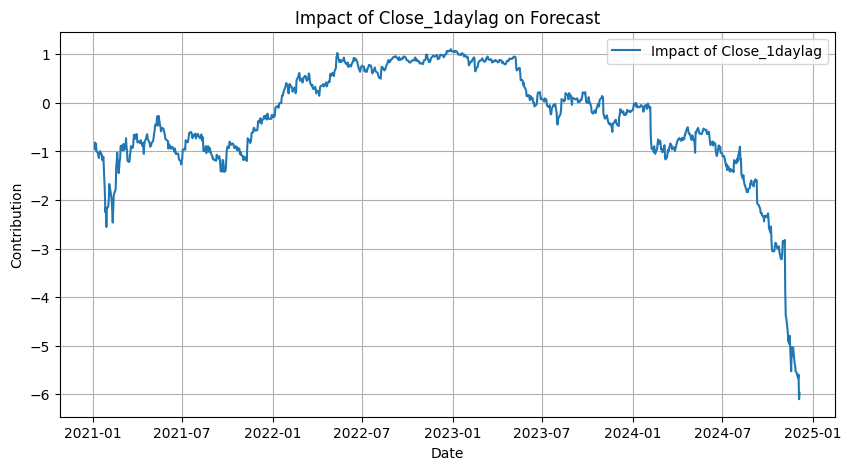

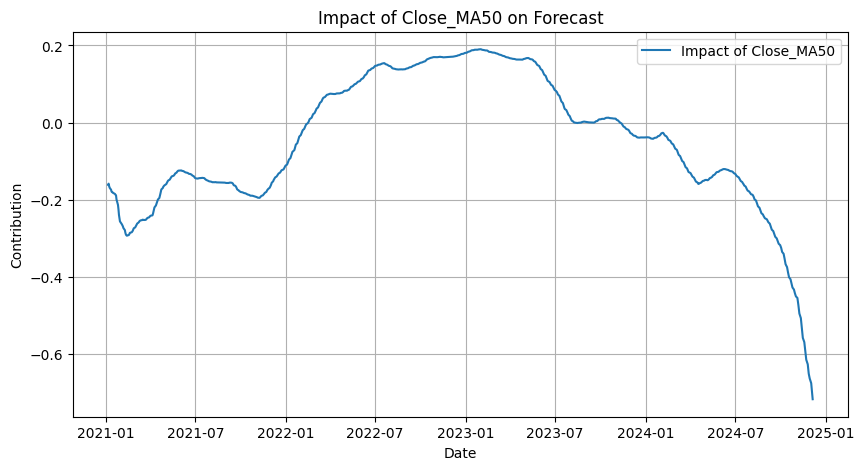

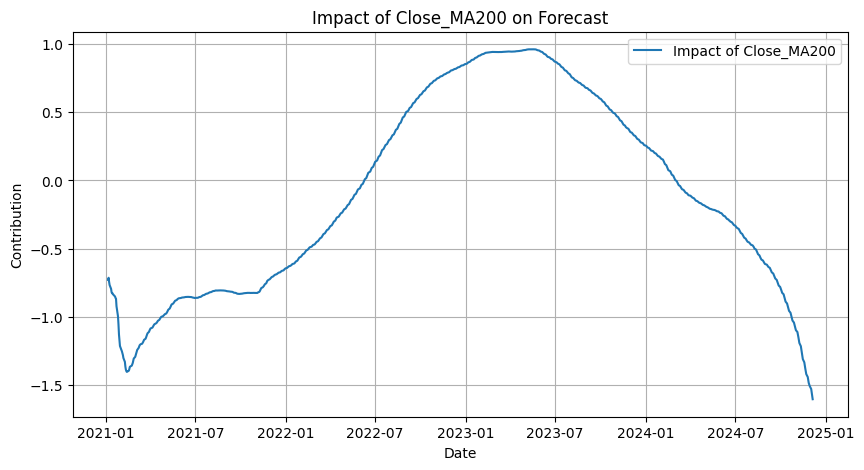

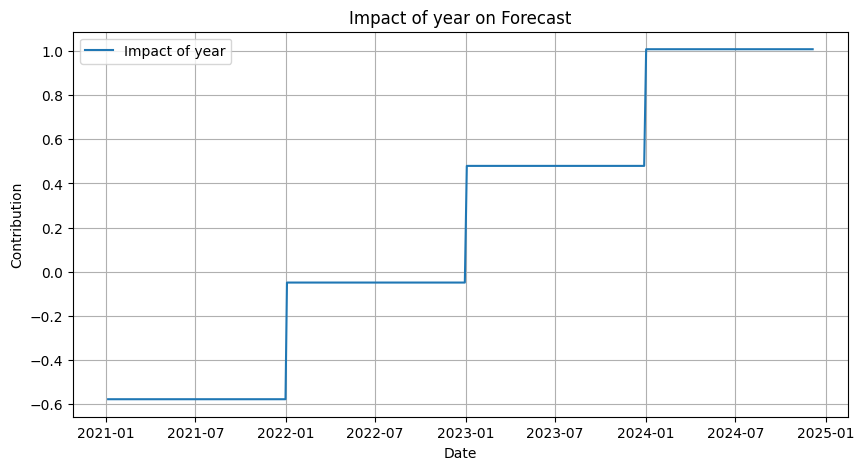

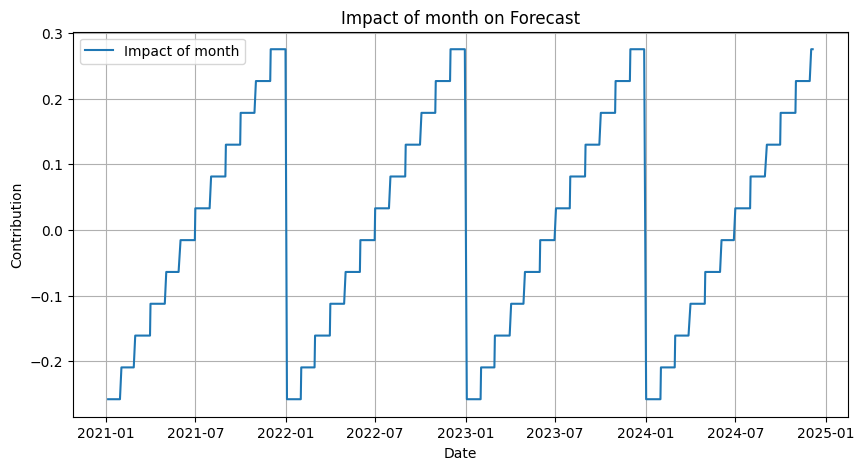

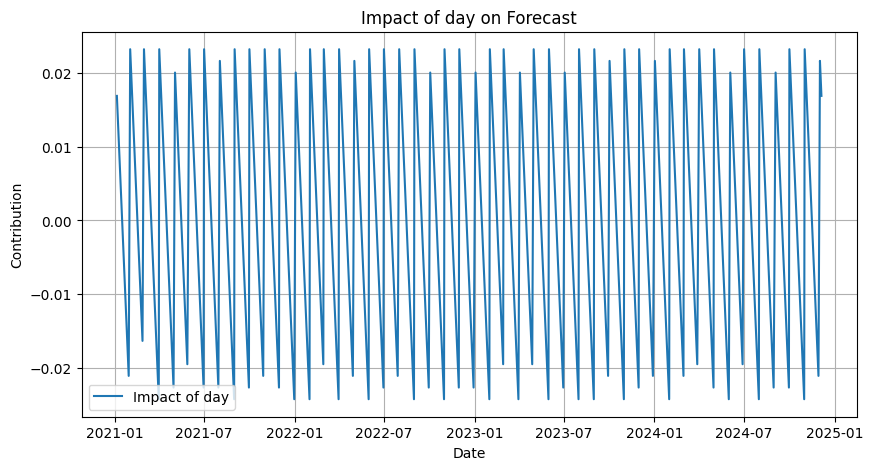

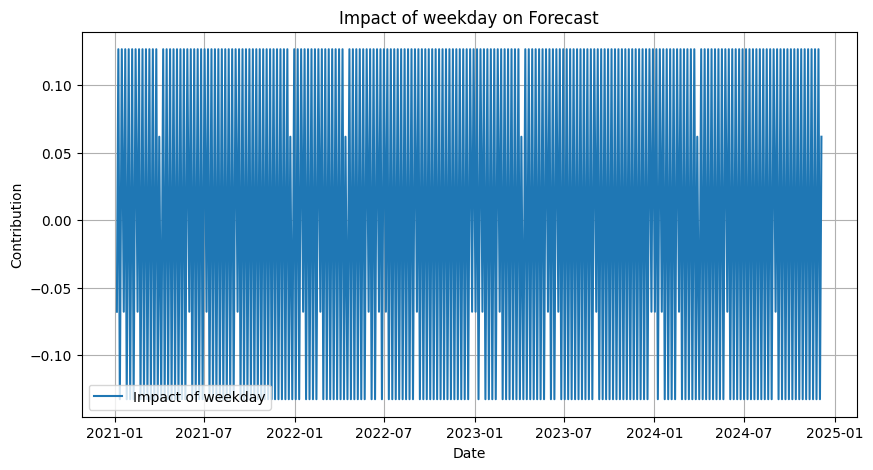

In [31]:
import matplotlib.pyplot as plt

# Plot the impact of each regressor
for regressor in X_cols:
    if regressor in forecast:
        plt.figure(figsize=(10, 5))
        plt.plot(forecast['ds'], forecast[regressor], label=f'Impact of {regressor}')
        plt.title(f'Impact of {regressor} on Forecast')
        plt.xlabel('Date')
        plt.ylabel('Contribution')
        plt.legend()
        plt.grid()
        plt.show()


# EXPLANATIONS OF CODE BELOW -forecast['residuals']

This code calculates and visualizes the residuals (differences between actual values and predicted values) from the model's forecast. Here's a detailed explanation:


# 1. Calculate Residuals

#forecast['residuals'] = forecast['y'] - forecast['yhat']


forecast['y']: The actual observed values from the data.


forecast['yhat']: The predicted values from the Prophet model.

Residuals are computed as:

Residual=Actual Value−Predicted Value

Residual=Actual Value−Predicted Value

Residuals indicate the error in the model's predictions:

A residual of 0 means the prediction was perfect.

Positive residual: The model underpredicted.

Negative residual: The model overpredicted.


# 2. Initialize the Plot

#plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7)):
Creates a figure with a specified size (14 inches wide, 7 inches tall) for better readability.


# 3. Plot Residuals Over Time

#plt.plot(forecast['ds'], forecast['residuals'], label='Residuals', color='purple')

forecast['ds']: Dates of the observations (x-axis).

forecast['residuals']: Residuals (y-axis).

label='Residuals': Adds a label for the legend.

color='purple': Plots the residuals in purple for visibility.



# 4. Add Reference Line at Zero

plt.axhline(0, linestyle='--', color='red')

plt.axhline(0): Draws a horizontal line at y = 0 as a reference.

linestyle='--': Dashed line for distinction.

color='red': Uses red to make the reference line noticeable.


# 5. Add Titles, Labels, and Grid

#plt.title('Residuals Over Time')

#plt.xlabel('Date')

#plt.ylabel('Residuals')

#plt.legend()

#plt.grid()

plt.title: Adds the title "Residuals Over Time."

plt.xlabel and plt.ylabel: Label the x-axis as "Date" and the y-axis as "Residuals."

plt.legend(): Adds a legend identifying the residual line.

plt.grid(): Adds a grid to make the plot easier to interpret.


# 6. Display the Plot

#plt.show()

plt.show(): Renders the plot.


# What the Plot Shows

X-axis: Dates.

Y-axis: Residuals (errors).

Horizontal line at 0: Indicates the point of perfect prediction.

Purpose:

Visualize patterns in residuals.

Identify systematic errors (e.g., if residuals are consistently positive or negative).

Spot heteroscedasticity (variance of residuals changes over time).



# Use Case

Model Diagnostics:
    
Check if the residuals are randomly distributed over time (indicating a good fit).

Identify potential model issues if patterns or trends exist in residuals.


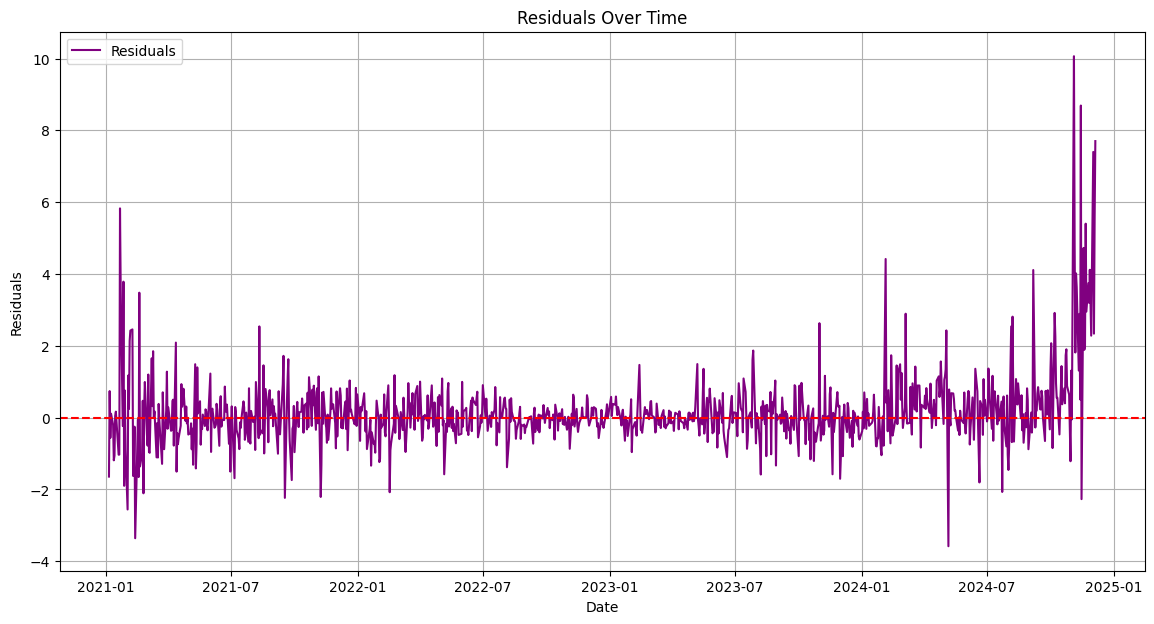

In [32]:
# Calculate residuals
forecast['residuals'] = forecast['y'] - forecast['yhat']

# Plot residuals over time
plt.figure(figsize=(14, 7))
plt.plot(forecast['ds'], forecast['residuals'], label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()